<a href="https://colab.research.google.com/github/MartinGalvao/DataScience/blob/main/Proyecto_ParteIII_%2BGalvao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 👨🏻‍⚕Prediccion Riesgo de Accidente Cerebrovascular👨🏻‍⚕ </b></div>

<h3 align="center" style="font-size: 35px; color: #800080; font-family:

*   Elemento de la lista
*   Elemento de la lista

Georgia;">
    <span style="color: #008080;"> Autor :</span>
    <span style="color: black;"> Martin Galvao 📄🖋️</span>
</h3>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 👋🏻 Introduccion 👋🏻 </b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

<h3 align="left"><font color=cyan>📜 Resumen 📜 </font></h3><br>

1. En este trabajo, se encontraran datos sobre los diferentes pacientes, los cuales seran analizados.

2. Los hallazgos son:
La edad, si el paciente tiene hipertension o no, si tiene/tuvo enfermedades cardiacas y si es fumador o no, son condicionales para que ocurra un Accidente Cerebro Vascular.
El genero, el IMC y el nivel de glucosa en sangre de cada paciente, no es un condicional para que ocurra un Accidente Cerebro Vascular

<h3 align="left"><font color=cyan>📝 Objetivo del Proyecto 📝 </font></h3><br>
    

1. El objetivo del trabajo es predecir la probabilidad de riesgos de Accidente Cerebro Vascular, utilizando un conjunto de datos con información sobre diferentes variables como género, edad, hipertensión, enfermedades cardíacas, nivel de glucosa, índice de masa corporal y estado de fumador.

2. Evaluar y <b> comparar el rendimiento de diferentes técnicas de aprendizaje automático </b> para determinar el enfoque más eficaz para la predicción de las distintas enfermedades proporcionando información para posibles aplicaciones en el area de salud.<br>
    

    
    
<h3 align="left"><font color=cyan> 👥Motivación y audiencia👥  </font></h3><br>

1. Lo que motiva a analizar estos datos, es lograr combatir estos niveles de riesgo para el Accidente Cerebro Vascular.

2. La audiencia que se podria beneficiar de este analisis, serian los pacientes ya sean que tengan riesgo o no e intentar ayudarlos a combatir este riesgo o evitarlo.
    
    

<h3 align="left"><font color=cyan> 👨🏼‍💼 Contexto Comercial 👨🏼‍💼  </font></h3><br>
 El contexto comercial de este trabajo es la predicción de riesgos de Accidente Cerebro Vascular utilizando datos demográficos y de salud. El análisis, busca identificar factores de riesgo y construir un modelo predictivo para ayudar en la prevención o detección temprana de esta condición médica.

**Posibles escenarios comerciales:**

1. Compañías de seguros: Utilizar el modelo para evaluar el riesgo de sus asegurados y ajustar las primas de seguros de salud.

2. Instituciones de salud: Identificar a pacientes con alto riesgo de derrame cerebral para ofrecerles intervenciones preventivas o atención médica temprana.

3. Investigación médica: Aportar información valiosa para estudios sobre los factores de riesgo de derrames cerebrales y el desarrollo de nuevas estrategias de prevención.

4. Aplicaciones móviles de salud: Integrar el modelo en una aplicación para brindar a los usuarios información personalizada sobre su riesgo y sugerencias para mejorar su salud.




<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Import Librerias 📚</b></div>

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import xgboost as xgb
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Carga Dataset ⏳</b></div>

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/MartinGalvao/DataScience/main/healthcare-dataset-stroke-data.csv")

In [4]:
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Preprocesamiento de los Datos 🧠</b></div>

### 1. Observar la dimension del Dataset

In [5]:
df.shape

(5110, 12)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Hay un total de **5110 Registros/Filas** en el dataset.
* Hay un total de **12 Funciones/Columnas** en el dataset.


### 2. Generación de Información Básica sobre Datos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Columns: 12 entries, id to stroke
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Hay **float64(3)** en el dataset.
* Hay **int 64(4)** en el dataset.
* Hay **object(5)** en el dataset.

### 3. Modificacion de nombre de columnas.

In [8]:
#Modificacion Nombre de Columnas
df = df.rename(columns={'heart_disease': 'Enfermedades Cardiacas'})
df = df.rename(columns={'hypertension': 'Hipertensión'})
df = df.rename(columns={'avg_glucose_level': 'Nivel Promedio de Glucosa en Sangre'})
df = df.rename(columns={'bmi': 'Indice de Masa Corporal'})
df = df.rename(columns={'stroke': 'Derrame Cerebral'})
df = df.rename(columns={'smoking_status': 'Estado de Fumador'})
df = df.rename(columns={'gender': 'Genero'})
df = df.rename(columns={'age': 'Edad'})
df = df.rename(columns={'ever_married': 'Casado'})
df = df.rename(columns={'work_type': 'Tipo de Trabajo'})
df = df.rename(columns={'Residence_type': 'Tipo de Residencia'})

In [9]:
df.head(10)

,id,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Casado,Tipo de Trabajo,Tipo de Residencia,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se cambiaron el nombre de las columnas de **Ingles a Español**.

### 4. Modificacion de los nombres de los valores.

In [10]:
#Modificacion de valores (Se cambio de ingles a español)
df['Genero'] = df['Genero'].replace({
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Other': 'Otro'
})
df ['Estado de Fumador'] = df['Estado de Fumador'].replace({
    'formerly smoked': 'Anteriormente fumador',
    'never smoked': 'Nunca fumó',
    'smokes': 'Fumador',
    'Unknown': 'Desconocido'
})
df ["Tipo de Trabajo"] = df["Tipo de Trabajo"].replace({
    'Private': 'Privado',
    'Self-employed': 'Empresario',
    'children': 'Niños',
    'Govt_job': 'Gobierno',
    'Never_worked': 'Nunca trabajo'
})
df ["Tipo de Residencia"] = df["Tipo de Residencia"].replace({
    'Urban': 'Urbano',
    'Rural': 'Rural'
})
df ["Casado"] = df["Casado"].replace({
    'Yes': 'Si',
    'No': 'No'
})

In [11]:
df.head(10)

,id,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Casado,Tipo de Trabajo,Tipo de Residencia,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,9046,Masculino,67.0,0,1,Si,Privado,Urbano,228.69,36.6,Anteriormente fumador,1
1,51676,Femenino,61.0,0,0,Si,Empresario,Rural,202.21,NaN,Nunca fumó,1
2,31112,Masculino,80.0,0,1,Si,Privado,Rural,105.92,32.5,Nunca fumó,1
3,60182,Femenino,49.0,0,0,Si,Privado,Urbano,171.23,34.4,Fumador,1
4,1665,Femenino,79.0,1,0,Si,Empresario,Rural,174.12,24.0,Nunca fumó,1
5,56669,Masculino,81.0,0,0,Si,Privado,Urbano,186.21,29.0,Anteriormente fumador,1
6,53882,Masculino,74.0,1,1,Si,Privado,Rural,70.09,27.4,Nunca fumó,1
7,10434,Femenino,69.0,0,0,No,Privado,Urbano,94.39,22.8,Nunca fumó,1
8,27419,Femenino,59.0,0,0,Si,Privado,Rural,76.15,NaN,Desconocido,1
9,60491,Femenino,78.0,0,0,Si,Privado,Urbano,58.57,24.2,Desconocido,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se cambiaron los nombres de los valores  de **Ingles a Español**.

### 5. Eliminacion de columnas insignificantes.

In [12]:
#Elimino las columnas insignificantes
df = df.drop(columns='id')
df = df.drop(columns='Casado')
df = df.drop(columns='Tipo de Trabajo')
df = df.drop(columns="Tipo de Residencia")
df.shape

(5110, 8)

In [13]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,Masculino,67.0,0,1,228.69,36.6,Anteriormente fumador,1
1,Femenino,61.0,0,0,202.21,NaN,Nunca fumó,1
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
3,Femenino,49.0,0,0,171.23,34.4,Fumador,1
4,Femenino,79.0,1,0,174.12,24.0,Nunca fumó,1
5,Masculino,81.0,0,0,186.21,29.0,Anteriormente fumador,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,NaN,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se eliminaron columnas insignificantes que no **generan un cambio a mi analisis**.

### 6. Busqueda de valores perdidos.

In [14]:
null_df = df.isnull().sum().to_frame().rename(columns={0:"Total de valores perdidos"})
null_df["% Valores perdidos"] = round(100*null_df["Total de valores perdidos"]/len(df),2)
null_df.sort_values(by="% Valores perdidos",ascending=False)

,Total de valores perdidos,% Valores perdidos
Indice de Masa Corporal,201,3.93
Genero,0,0.00
Edad,0,0.00
Hipertensión,0,0.00
Enfermedades Cardiacas,0,0.00
Nivel Promedio de Glucosa en Sangre,0,0.00
Estado de Fumador,0,0.00
Derrame Cerebral,0,0.00


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* A ninguna de las columnas le **faltan valores**.
* Por tanto, podemos decir que **el conjunto de datos será más fiable para predecir**.

### 7. Busqueda y remplazo de datos nulos.

In [15]:
#Busco los datos nulos
df.isnull().sum()

,0
Genero,0
Edad,0
Hipertensión,0
Enfermedades Cardiacas,0
Nivel Promedio de Glucosa en Sangre,0
Indice de Masa Corporal,201
Estado de Fumador,0
Derrame Cerebral,0


In [16]:
# Reemplazo los valores NaN en la columna 'Indice de Masa Corporal' con la mediana
df['Indice de Masa Corporal'] = df['Indice de Masa Corporal'].fillna(df['Indice de Masa Corporal'].median())

In [17]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
0,Masculino,67.0,0,1,228.69,36.6,Anteriormente fumador,1
1,Femenino,61.0,0,0,202.21,28.1,Nunca fumó,1
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
3,Femenino,49.0,0,0,171.23,34.4,Fumador,1
4,Femenino,79.0,1,0,174.12,24.0,Nunca fumó,1
5,Masculino,81.0,0,0,186.21,29.0,Anteriormente fumador,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,28.1,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* Se reemplazaron los valores nulos de la columna Indice de Masa Corporal **por la mediana**.

### 8. Busqueda de valores duplicados.

In [18]:
print("Hay valores duplicados? => ",df.duplicated().any())
print("-"*42)
print("Total de valores duplicados =>",df[df.duplicated()==True].shape[0])

Hay valores duplicados? =>  False
------------------------------------------
Total de valores duplicados => 0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* No se encontraron **valores duplicados**.


### 9. Manipulacion de Outliers

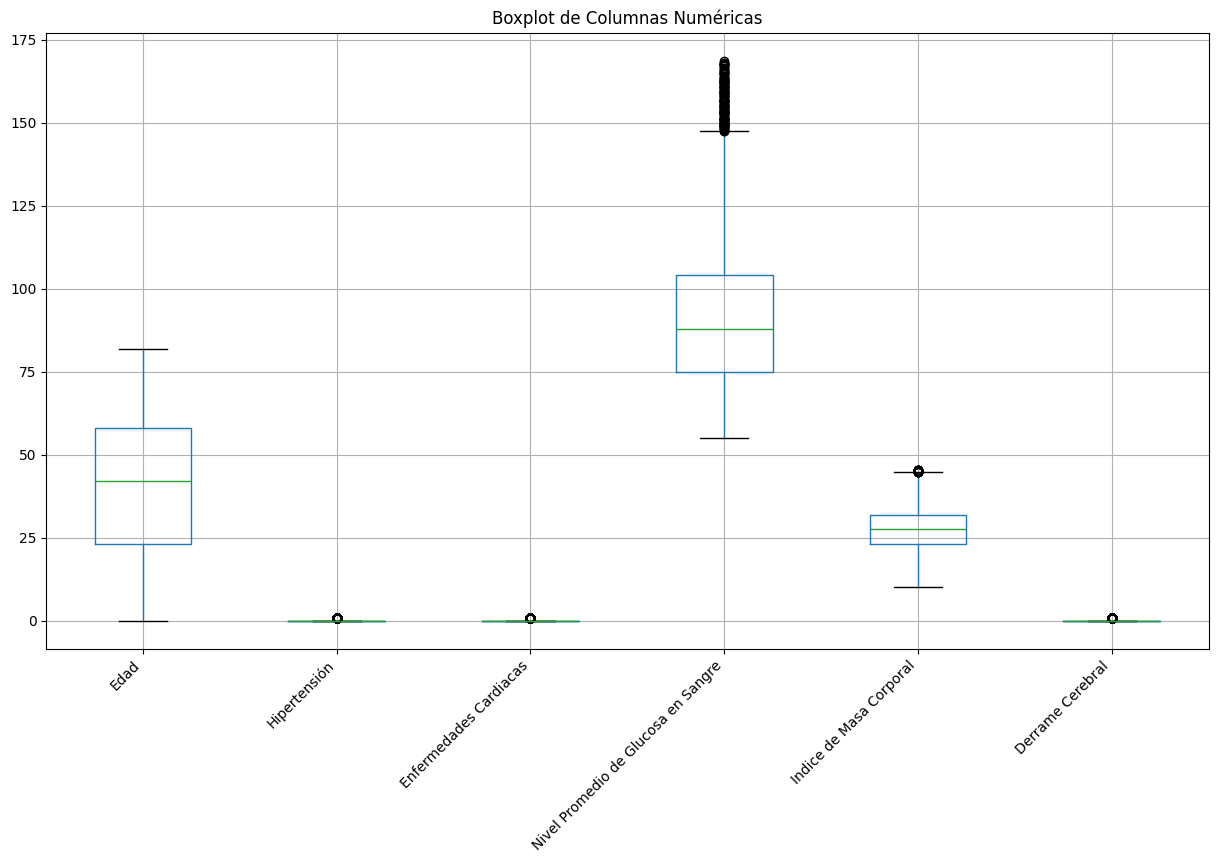

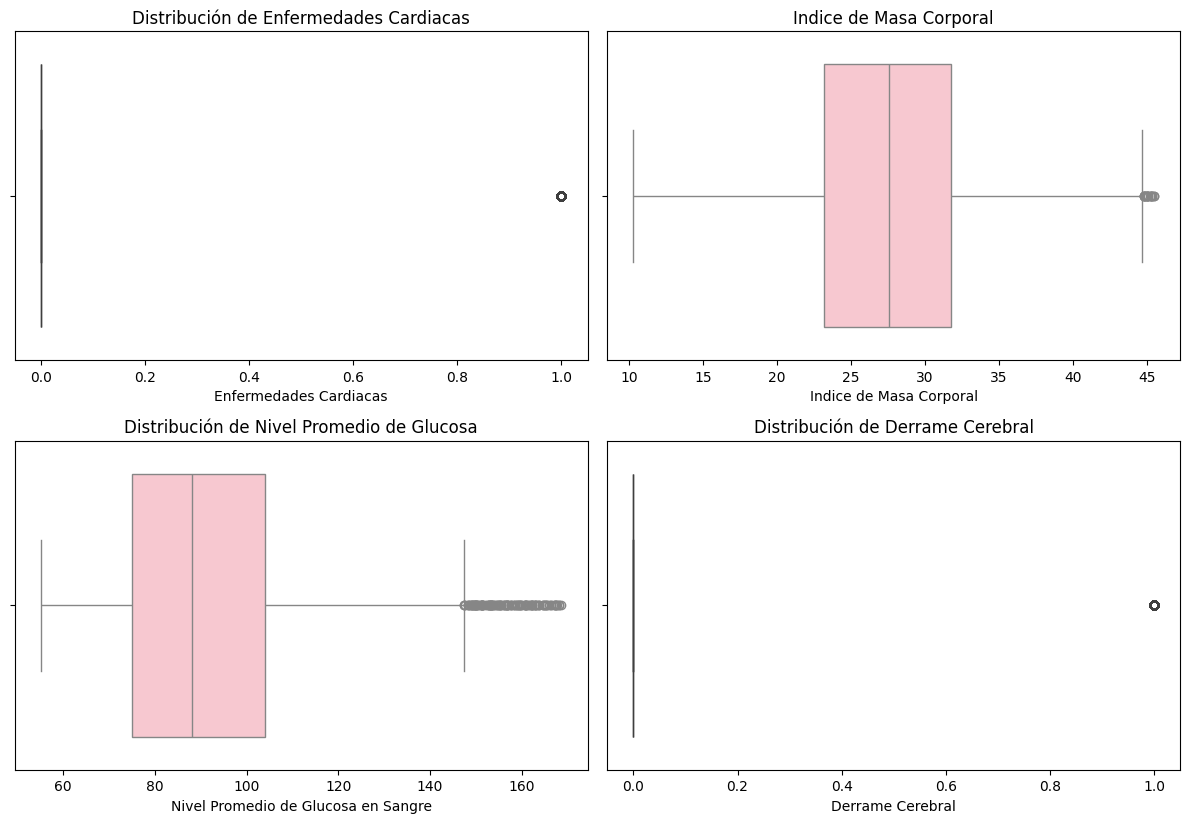

In [19]:
# Definir una función para eliminar outliers usando el método IQR
def eliminar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_sin_outliers = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_sin_outliers

# Aplicar la función a las columnas numéricas
columnas_numericas = ['Edad', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal']
for col in columnas_numericas:
    df = eliminar_outliers_iqr(df, col)


# Se seleccionaron solo las columnas numéricas
numeric_columns = df.select_dtypes(include=np.number).columns

# Se creo el gráfico de boxplot
plt.figure(figsize=(15, 8))
df.boxplot(column=list(numeric_columns))
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de Columnas Numéricas')
plt.show()

# Se creo una cuadrícula 3x2 para los subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Boxplot para Enfermedades Cardiacas
sns.boxplot(x=df['Enfermedades Cardiacas'], ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Enfermedades Cardiacas')


# Boxplot para BMI
sns.boxplot(x=df['Indice de Masa Corporal'], ax=axes[0, 1], color = "pink")
axes[0, 1].set_title('Indice de Masa Corporal')


# Boxplot para Nivel Promedio de Glucosa en Sangre
sns.boxplot(x=df['Nivel Promedio de Glucosa en Sangre'], ax=axes[1, 0], color = "pink")
axes[1, 0].set_title('Distribución de Nivel Promedio de Glucosa')

# Boxplot para Derrame Cerebral
sns.boxplot(x=df['Derrame Cerebral'], ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Derrame Cerebral')




# Se elimino los subplots vacíos
fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 1])

# Se ajusto el diseño
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* En estos graficos se puede ver la eliminacion de los outliers.
* Se eliminaron los outliers para mejorar los modelos.


### 10. Realización de análisis estadístico descriptivo de características numéricas.

In [20]:
df.describe().T.style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,count,mean,std,min,25%,50%,75%,max
Edad,4383.000000,40.893762,22.565008,0.080000,23.000000,42.000000,58.000000,82.000000
Hipertensión,4383.000000,0.074378,0.262415,0.000000,0.000000,0.000000,0.000000,1.000000
Enfermedades Cardiacas,4383.000000,0.039243,0.194194,0.000000,0.000000,0.000000,0.000000,1.000000
Nivel Promedio de Glucosa en Sangre,4383.000000,91.476126,22.663253,55.120000,75.075000,88.040000,104.025000,168.680000
Indice de Masa Corporal,4383.000000,27.744673,6.518535,10.300000,23.200000,27.600000,31.800000,45.500000
Derrame Cerebral,4383.000000,0.037417,0.189804,0.000000,0.000000,0.000000,0.000000,1.000000


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

* La media de Edad  es de **40.81**.
* La media de la Hipertension es de **0.073**.
* La media de las Enfermedades Cardiacas es de **0.039**.
* La media de los Derrames Cerebrales es de **0.037**.
* La media del Nivel Promedio de Glucosa en Sangre es de **89.12**.
* La media del IMC  es de **27.63**.


### 11. Descripcion de mi dataset.

In [21]:
df.head(10)

,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral
2,Masculino,80.0,0,1,105.92,32.5,Nunca fumó,1
6,Masculino,74.0,1,1,70.09,27.4,Nunca fumó,1
7,Femenino,69.0,0,0,94.39,22.8,Nunca fumó,1
8,Femenino,59.0,0,0,76.15,28.1,Desconocido,1
9,Femenino,78.0,0,0,58.57,24.2,Desconocido,1
10,Femenino,81.0,1,0,80.43,29.7,Nunca fumó,1
11,Femenino,61.0,0,1,120.46,36.8,Fumador,1
12,Femenino,54.0,0,0,104.51,27.3,Fumador,1
15,Femenino,50.0,1,0,167.41,30.9,Nunca fumó,1
18,Femenino,60.0,0,0,89.22,37.8,Nunca fumó,1


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=cyan>📊 Conclusion:</font></h3>

*   **Genero:** Muestra si las personas son Hombres o Mujeres.
*   **Edad:**  Muestra la edad de las personas.
*   **Hipertension:** Muestra 0 si las personas no tienen hipertension y 1 si tienen hipertension.
*   **Enfermedades Cardiacas:** Muestra 0 si las personas no tienen enfermedades cardicacas y 1 si tienen enfermedades cardiacas.
*   **Nivel Promedio de Glucosa en Sangre:** Muestra el promedio de glucosa de las personas.
*  **Indice de Masa Corporal:** Muestra el promedio de masa corporal de las personas.
*   **Estado de Fumador:** Muestra el estado del fumador
*   **Derrame Cerebral:** Muestra 0 si las personas no tienen derrames cerebrales y 1 si tienen derrames cerebrales.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📊 Exploratory Data Analysis (EDA)📊</b></div>

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Para iniciar es importante conocer la cantidad de pacientes que tenemos. </div>

In [22]:


print(f"Numero total de pacientes: {len(df)}")

Numero total de pacientes: 4383


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 1. Visualizacion "Variable Objetivo" (Derrame Cerebral). </div>

In [23]:
#Determinacion de la variable target
target_variable = 'Derrame Cerebral'
print(f"La variable Objetivo es: {target_variable}")

La variable Objetivo es: Derrame Cerebral


<ipython-input-24-7be31259518c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[target_variable], palette=colors)


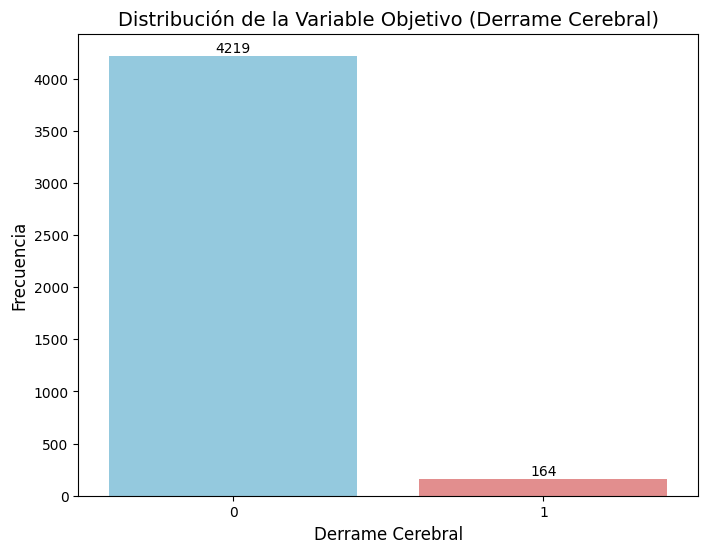

Podemos observar la frecuencia de ocurrencia de nuestra variable objetivo (Derrame Cerebral)


In [24]:

# Visualización de la "Variable objetivo"



plt.figure(figsize=(8, 6))
colors = ["skyblue", "lightcoral"]
ax = sns.countplot(x=df[target_variable], palette=colors)
plt.title(f'Distribución de la Variable Objetivo ({target_variable})', fontsize=14)
plt.xlabel(target_variable, fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()
print("Podemos observar la frecuencia de ocurrencia de nuestra variable objetivo (Derrame Cerebral)")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Derrame Cerebral**.
* 164 Pacientes tuvieron **Derrames Cerebrales** y 4219 no tuvieron **Derrames Cerebrales**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 2. Visualizacion "Enfermedades Cardiacas" Atributo. </div>

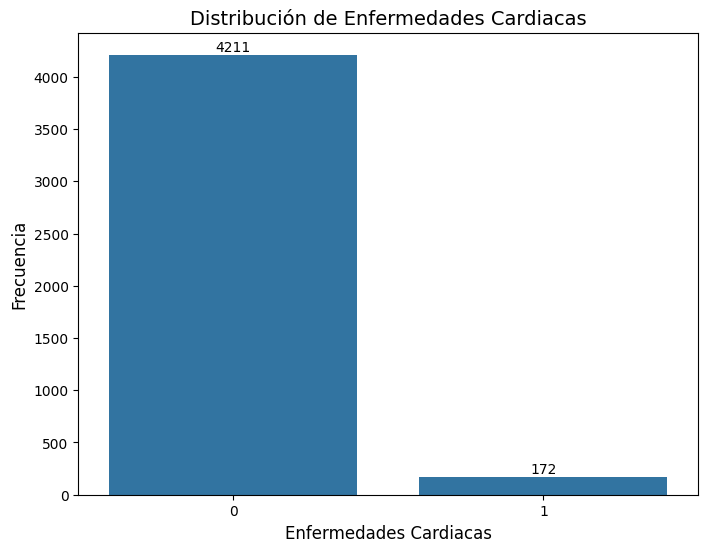

Podemos observar la frecuencia de ocurrencia de la variable 'Enfermedades Cardiacas'


In [25]:


# Visualización de la variable "Enfermedades Cardiacas"


plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Enfermedades Cardiacas'])
plt.title('Distribución de Enfermedades Cardiacas', fontsize=14)
plt.xlabel('Enfermedades Cardiacas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()
print("Podemos observar la frecuencia de ocurrencia de la variable 'Enfermedades Cardiacas'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Enfermedades Cardiacas**.
* 172 Pacientes tuvieron **Enfermedades Cardiacas** y 4211 no tuvieron **Enfermedades Cardiacas**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 3. Visualizacion "Hipertension" Atributo. </div>


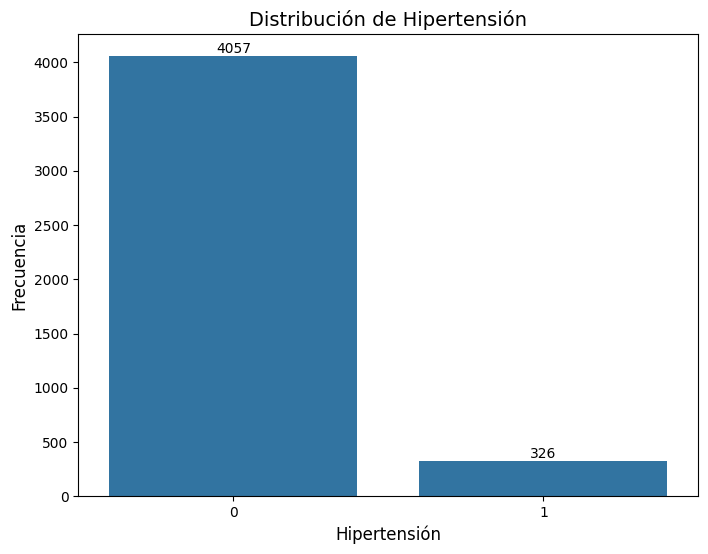

Podemos observar la frecuencia de ocurrencia de la variable 'Hipertensión'


In [26]:

# Visualización de la variable "Hipertensión"


plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Hipertensión'])
plt.title('Distribución de Hipertensión', fontsize=14)
plt.xlabel('Hipertensión', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("Podemos observar la frecuencia de ocurrencia de la variable 'Hipertensión'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Hipertensión**.
* 326 Pacientes tuvieron **Hipertensión** y 4057 no tuvieron **Hipertensión**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 4. Visualizacion "Nivel Promedio de Glucosa en Sangre" Atributo. </div>

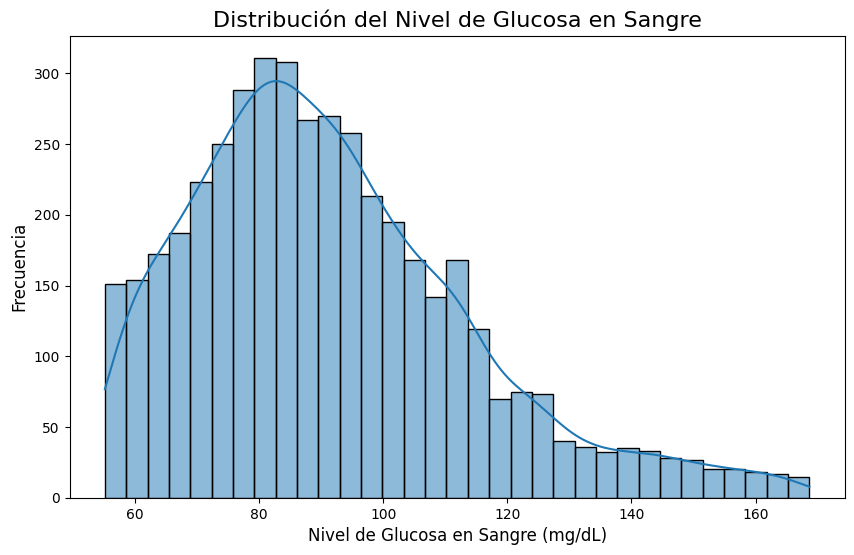

La media del nivel de glucosa en sangre es: 91.48 mg/dL


In [27]:


# Visualización del nivel de glucosa en sangre
plt.figure(figsize=(10, 6))
sns.histplot(df['Nivel Promedio de Glucosa en Sangre'], kde=True)
plt.title('Distribución del Nivel de Glucosa en Sangre', fontsize=16)
plt.xlabel('Nivel de Glucosa en Sangre (mg/dL)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Cálculo de la media del nivel de glucosa en sangre
media_glucosa = df['Nivel Promedio de Glucosa en Sangre'].mean()
print(f'La media del nivel de glucosa en sangre es: {media_glucosa:.2f} mg/dL')

In [28]:


# Calcula el número de pacientes con un nivel promedio de glucosa en sangre alto
# Consideramos "alto" como superior a la media
media_glucosa = df['Nivel Promedio de Glucosa en Sangre'].mean()
pacientes_glucosa_alta = len(df[df['Nivel Promedio de Glucosa en Sangre'] > media_glucosa])

print(f"Hay {pacientes_glucosa_alta} pacientes con un nivel promedio de glucosa en sangre superior a la media ({media_glucosa:.2f})mg/dL.")

Hay 1922 pacientes con un nivel promedio de glucosa en sangre superior a la media (91.48)mg/dL.


In [29]:


# Calcula el número de pacientes con un nivel promedio de glucosa en sangre bajo
# Consideramos "bajo" como inferior a la media
pacientes_glucosa_baja = len(df[df['Nivel Promedio de Glucosa en Sangre'] < media_glucosa])

print(f"Hay {pacientes_glucosa_baja} pacientes con un nivel promedio de glucosa en sangre inferior a la media ({media_glucosa:.2f})mg/dL.")

Hay 2461 pacientes con un nivel promedio de glucosa en sangre inferior a la media (91.48)mg/dL.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Nivel Promedio de Glucosa en Sangre**.
* La media de **Nivel Promedio de Glucosa en Sangre** es de **(91.48)mg/dL**. Hay 1922 pacientes con un **nivel promedio de glucosa en sangre superior a la media (91.48)mg/dL** y 2461 pacientes con un **nivel promedio de glucosa en sangre inferior a la media (91.48)mg/dL**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 5. Visualizacion "Indice masa corporal" Atributo. </div>

La media del IMC es: 27.74 


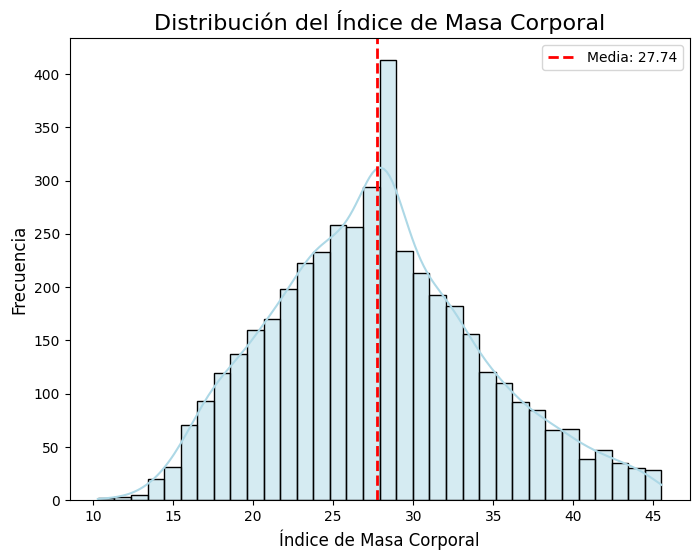

In [30]:

# Calcula la media del índice de masa corporal
media_imc = df['Indice de Masa Corporal'].mean()
print(f'La media del IMC es: {media_imc:.2f} ')

# Crea el gráfico
plt.figure(figsize=(8, 6))
sns.histplot(df['Indice de Masa Corporal'], kde=True, color="lightblue")
plt.axvline(media_imc, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_imc:.2f}')
plt.title('Distribución del Índice de Masa Corporal', fontsize=16)
plt.xlabel('Índice de Masa Corporal', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()





In [31]:


# Calcula el número de pacientes con un IMC alto
# Consideramos "alto" como superior a la media
media_imc = df['Indice de Masa Corporal'].mean()
pacientes_imc_alto = len(df[df['Indice de Masa Corporal'] > media_imc])

print(f"Hay {pacientes_imc_alto} pacientes con un IMC superior a la media ({media_imc:.2f})")

Hay 2153 pacientes con un IMC superior a la media (27.74)


In [32]:

# Calcula el número de pacientes con un IMC bajo
# Consideramos "bajo" como inferior a la media
media_imc = df['Indice de Masa Corporal'].mean()
pacientes_imc_bajo = len(df[df['Indice de Masa Corporal'] < media_imc])

print(f"Hay {pacientes_imc_bajo} pacientes con un IMC bajo inferior a la media de ({media_imc:.2f})")

Hay 2230 pacientes con un IMC bajo inferior a la media de (27.74)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **IMC**.
* La media de **IMC** es de (27.74). Hay 2153 pacientes con un **IMC superior a la media (27.74)** y 2230 pacientes con un **IMC inferior a la media (27.74)**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 6. Visualizacion "Edad" Atributo. </div>

La media de edad es: 40.89 


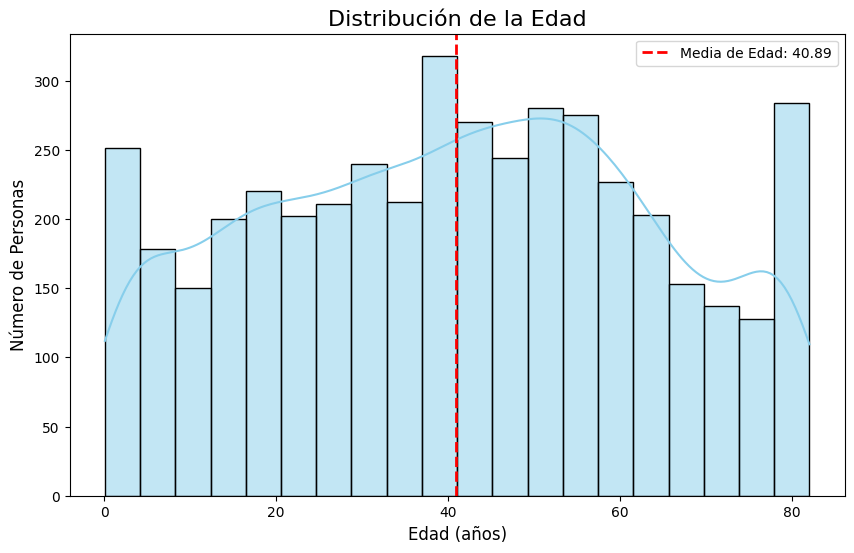

In [33]:
# Calcula la media de edad
media_edad = df['Edad'].mean()
print(f'La media de edad es: {media_edad:.2f} ')

# Crea el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], kde=True, color='skyblue')
plt.axvline(media_edad, color='red', linestyle='dashed', linewidth=2, label=f'Media de Edad: {media_edad:.2f}')
plt.title('Distribución de la Edad', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.legend()
plt.show()



In [34]:


# Calcula la cantidad de personas con edad superior a la media
personas_edad_superior_media = len(df[df['Edad'] > media_edad])

print(f"Hay {personas_edad_superior_media} pacientes con una edad superior a la media ({media_edad:.2f} años).")

Hay 2267 pacientes con una edad superior a la media (40.89 años).


In [35]:


# Calcula la cantidad de personas con edad inferior a la media
personas_edad_inferior_media = len(df[df['Edad'] < media_edad])

print(f"Hay {personas_edad_inferior_media} pacientes con una edad inferior a la media ({media_edad:.2f} años).")

Hay 2116 pacientes con una edad inferior a la media (40.89 años).


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Edad**.
* La media de **Edad** es de **(40.89)años**. Hay 2267 pacientes con una **Edad superior a la media (40.89)años** y 2116 pacientes con una **Edad inferior a la media (40.89)años**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 7. Visualizacion "Genero" Atributo. </div>

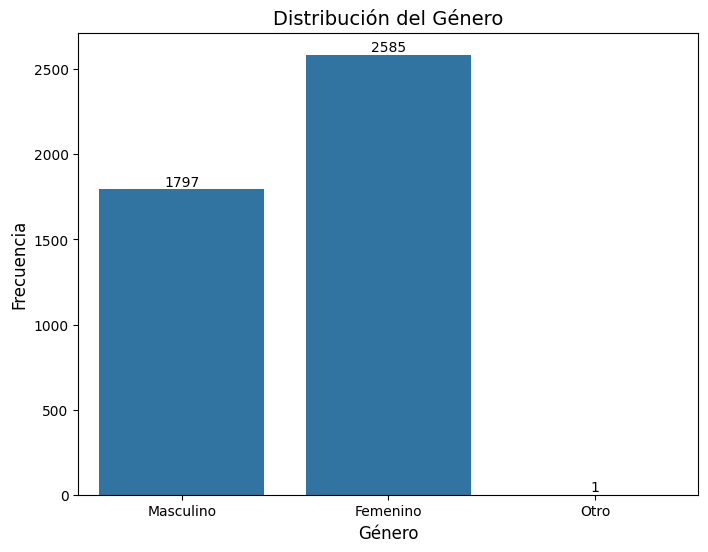

Podemos observar la frecuencia de ocurrencia de la variable 'Género'


In [36]:

# Visualización de la variable "Género"


plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['Genero'])
plt.title('Distribución del Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("Podemos observar la frecuencia de ocurrencia de la variable 'Género'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Genero**.
* 1797 Pacientes son **Masculinos** , 2585 pacientes son **Femeninos** y 1 paciente es de **otro genero**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 8. Visualizacion "Estado Fumador" Atributo. </div>

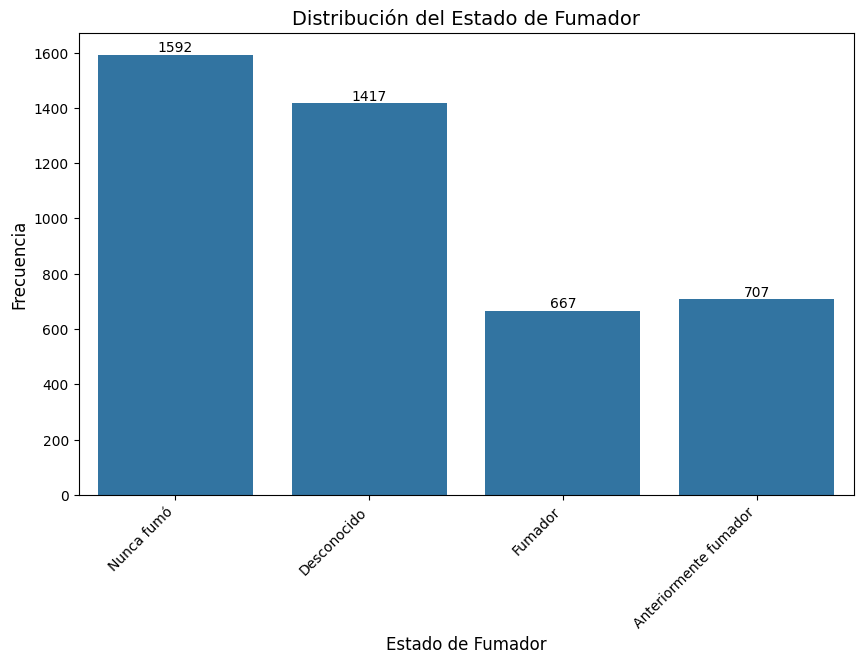

Podemos observar la frecuencia de ocurrencia de la variable 'Estado de Fumador'


In [37]:


# Visualización de la variable "Estado de Fumador"


plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['Estado de Fumador'])
plt.title('Distribución del Estado de Fumador', fontsize=14)
plt.xlabel('Estado de Fumador', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad

# Agregar etiquetas de conteo a las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("Podemos observar la frecuencia de ocurrencia de la variable 'Estado de Fumador'")

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Observacion:</font></h3>

* En este grafico podemos ver como estan dividos nuestros pacientes por **Estado de Fumador**.
* 707 Pacientes son **Anteriormente Fumador** , 1592 pacientes **Nunca Fumaron** ,  667 pacientes son **Fumadores** y 1417 pacientes **No se conoce**.
* Entonces usaremos **técnicas de transformación** para transformar estas características para que tengan una **distribución simétrica**.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Hipotesis❓</b></div>

En este apartado se van a mostrar varias hipotesis para analizar.

Se hipotetiza que la presencia de ciertos factores de riesgo, como la hipertensión arterial, la diabetes, el tabaquismo y la edad, influyen significativamente en la probabilidad de sufrir un accidente cerebrovascular.  Específicamente, se espera que a mayor presencia y severidad de estos factores, mayor sea el riesgo predicho de un accidente cerebrovascular.


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Con respecto a la predicción de accidentes cerebrovasculares </div>

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 1.Hipotesis Edad y Riesgo de Accidente Cerebrovascular. </div>

🤔 La hipótesis planteada es  que los pacientes por encima de la edad media tengan una incidencia de Accidente Cerebrovascular significativamente mayor en comparación con los que tienen una edad inferior.

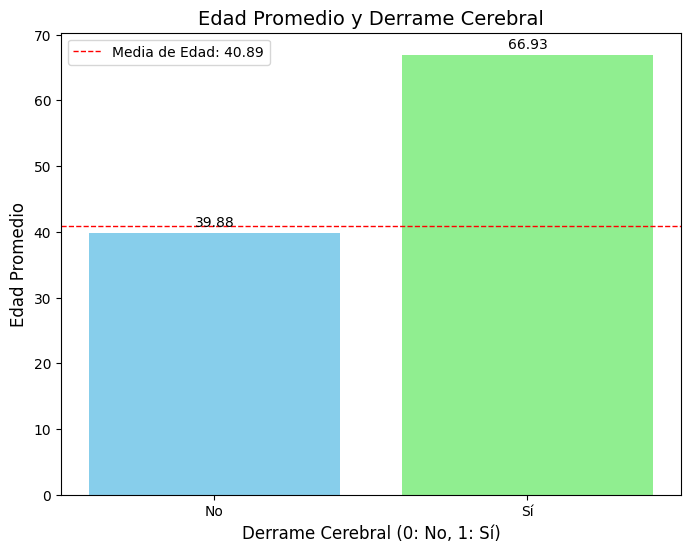

Pacientes con derrame cerebral mayores a la media de edad (40.89): 156
Pacientes con derrame cerebral menores o iguales a la media de edad (40.89): 8


In [38]:


# Crea un nuevo DataFrame con la información necesaria para el gráfico
stroke_by_age = df.groupby('Derrame Cerebral')['Edad'].mean().reset_index()

# Crea el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(stroke_by_age['Derrame Cerebral'], stroke_by_age['Edad'], color=['skyblue', 'lightgreen'])
plt.axhline(y=media_edad, color='red', linestyle='dashed', linewidth=1, label=f'Media de Edad: {media_edad:.2f}')

# Agrega etiquetas de conteo encima de cada barra
for i, v in enumerate(stroke_by_age['Edad']):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

plt.title('Edad Promedio y Derrame Cerebral', fontsize=14)
plt.xlabel('Derrame Cerebral (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Edad Promedio', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])  # Etiquetas más descriptivas
plt.legend()
plt.show()


# Calcula la cantidad de pacientes por encima y por debajo de la media de edad que tuvieron un derrame
pacientes_mayor_media_derrame = len(df[(df['Edad'] > media_edad) & (df['Derrame Cerebral'] == 1)])
pacientes_menor_media_derrame = len(df[(df['Edad'] <= media_edad) & (df['Derrame Cerebral'] == 1)])

print(f"Pacientes con derrame cerebral mayores a la media de edad ({media_edad:.2f}): {pacientes_mayor_media_derrame}")
print(f"Pacientes con derrame cerebral menores o iguales a la media de edad ({media_edad:.2f}): {pacientes_menor_media_derrame}")


Tasas de accidente cerebrovascular por grupo de edad:
            sum  count       Tasa
Grupo_Edad                       
0-19          2    942   0.212314
20-39         6   1110   0.540541
40-59        42   1311   3.203661
60-79        86    881   9.761635
80+          28    139  20.143885


<ipython-input-39-e14e3ace3a28>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_rates = df.groupby('Grupo_Edad')['Derrame Cerebral'].agg(['sum', 'count'])


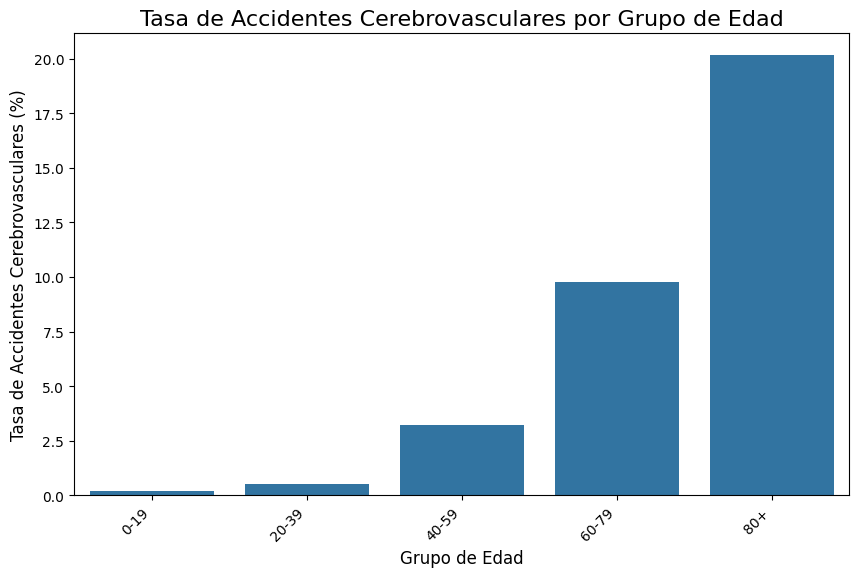

In [39]:

# Agrupar por rangos de edad y calcular la tasa de accidentes cerebrovasculares
bins = [0, 20, 40, 60, 80, 100]  # Define los rangos de edad
labels = ['0-19', '20-39', '40-59', '60-79', '80+']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

stroke_rates = df.groupby('Grupo_Edad')['Derrame Cerebral'].agg(['sum', 'count'])
stroke_rates['Tasa'] = (stroke_rates['sum'] / stroke_rates['count']) * 100

print("\nTasas de accidente cerebrovascular por grupo de edad:")
print(stroke_rates)


# Visualizar las tasas
plt.figure(figsize=(10, 6))
sns.barplot(x=stroke_rates.index, y=stroke_rates['Tasa'])
plt.title('Tasa de Accidentes Cerebrovasculares por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Tasa de Accidentes Cerebrovasculares (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
# Hipótesis 1: Edad y Riesgo de Accidente Cerebrovascular (Prueba t de Student)

# Dividir los datos en dos grupos: con y sin derrame cerebral
grupo_con_derrame = df[df['Derrame Cerebral'] == 1]['Edad']
grupo_sin_derrame = df[df['Derrame Cerebral'] == 0]['Edad']

# Prueba t de Student

t_statistic, p_value = ttest_ind(grupo_con_derrame, grupo_sin_derrame)

print(f"\nPrueba t de Student para Edad y Derrame Cerebral:")
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia notablle en la edad promedio entre los grupos con y sin derrame cerebral.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una diferencia notable en la edad promedio entre los grupos con y sin derrame cerebral.")



Prueba t de Student para Edad y Derrame Cerebral:
Estadístico t: 15.467617371210983
Valor p: 1.378185594074085e-52
Se rechaza la hipótesis nula. Existe una diferencia notablle en la edad promedio entre los grupos con y sin derrame cerebral.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* Los pacientes por encima de la edad media tienen una incidencia de accidente cerebrovascular notablemente mayor en comparación con los que tienen una edad inferior.
* Se rechaza la hipótesis nula. Existe una diferencia notable en la edad promedio entre los grupos con y sin derrame cerebral.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 2.Hipotesis IMC y Riesgo de Accidente Cerebrovascular. </div>

🤔 La hipótesis planteada es que los pacientes con un IMC por encima de cierto umbral tienen un mayor riesgo a sufrir Accidentes Cerebrovasculares.

In [41]:




# Cuenta la cantidad de pacientes con IMC mayor a la media que sufrieron un accidente cerebrovascular
contador_imc_alto_derrame = len(df[(df['Indice de Masa Corporal'] > media_imc) & (df['Derrame Cerebral'] == 1)])

# Cuenta la cantidad total de pacientes con IMC mayor a la media
contador_imc_alto_total = len(df[df['Indice de Masa Corporal'] > media_imc])

# Calcula el porcentaje de pacientes con IMC alto que sufrieron un derrame
porcentaje_derrame_imc_alto = (contador_imc_alto_derrame / contador_imc_alto_total) * 100 if contador_imc_alto_total > 0 else 0

print(f"Hay {contador_imc_alto_derrame} pacientes con un IMC superior a la media ({media_imc:.2f}) que sufrieron un accidente cerebrovascular.")
print(f"De los {contador_imc_alto_total} pacientes con IMC superior a la media, el {porcentaje_derrame_imc_alto:.2f}% sufrió un accidente cerebrovascular.")

# Puedes repetir el proceso para los pacientes con un IMC menor o igual a la media para comparar
contador_imc_bajo_derrame = len(df[(df['Indice de Masa Corporal'] <= media_imc) & (df['Derrame Cerebral'] == 1)])
contador_imc_bajo_total = len(df[df['Indice de Masa Corporal'] <= media_imc])
porcentaje_derrame_imc_bajo = (contador_imc_bajo_derrame / contador_imc_bajo_total) * 100 if contador_imc_bajo_total > 0 else 0

print(f"Hay {contador_imc_bajo_derrame} pacientes con un IMC menor o igual a la media ({media_imc:.2f}) que sufrieron un accidente cerebrovascular.")
print(f"De los {contador_imc_bajo_total} pacientes con IMC menor o igual a la media, el {porcentaje_derrame_imc_bajo:.2f}% sufrió un accidente cerebrovascular.")

Hay 101 pacientes con un IMC superior a la media (27.74) que sufrieron un accidente cerebrovascular.
De los 2153 pacientes con IMC superior a la media, el 4.69% sufrió un accidente cerebrovascular.
Hay 63 pacientes con un IMC menor o igual a la media (27.74) que sufrieron un accidente cerebrovascular.
De los 2230 pacientes con IMC menor o igual a la media, el 2.83% sufrió un accidente cerebrovascular.


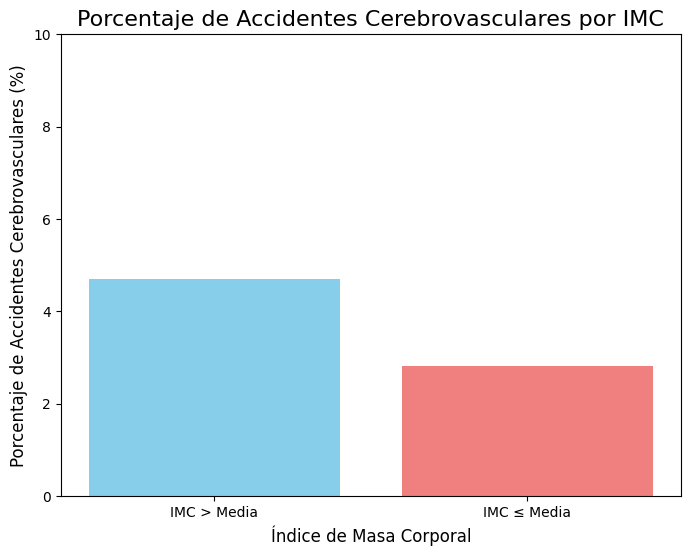

In [42]:
# prompt: generame un grafico  que muestre los pacientes con IMC superior a la media y su porcentaje de tener un accidente cerebrovascular en españoL

# Calcula el porcentaje de pacientes con IMC superior a la media que sufrieron un derrame
porcentaje_derrame_imc_alto = (contador_imc_alto_derrame / contador_imc_alto_total) * 100 if contador_imc_alto_total > 0 else 0

# Crea el gráfico
plt.figure(figsize=(8, 6))
plt.bar(['IMC > Media', 'IMC ≤ Media'], [porcentaje_derrame_imc_alto, porcentaje_derrame_imc_bajo], color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Accidentes Cerebrovasculares por IMC', fontsize=16)
plt.ylabel('Porcentaje de Accidentes Cerebrovasculares (%)', fontsize=12)
plt.xlabel('Índice de Masa Corporal', fontsize=12)
plt.ylim(0, 10) # Ajusta el rango del eje y
plt.show()

In [43]:
#Hipótesis 2: IMC y riesgo de accidente cerebrovascular (Prueba t de Student)
grupo_con_derrame_imc = df[df['Derrame Cerebral'] == 1]['Indice de Masa Corporal']
grupo_sin_derrame_imc = df[df['Derrame Cerebral'] == 0]['Indice de Masa Corporal']

t_statistic_imc, p_value_imc = ttest_ind(grupo_con_derrame_imc, grupo_sin_derrame_imc)

print(f"\nPrueba t de Student para IMC y Derrame Cerebral:")
print(f"Estadístico t: {t_statistic_imc}")
print(f"Valor p: {p_value_imc}")

if p_value_imc < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia notable en el IMC promedio entre los grupos con y sin derrame cerebral.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una diferencia notable en el IMC promedio entre los grupos con y sin derrame cerebral.")


Prueba t de Student para IMC y Derrame Cerebral:
Estadístico t: 1.9172047472676121
Valor p: 0.0552768912195917
No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una diferencia notable en el IMC promedio entre los grupos con y sin derrame cerebral.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* Los pacientes por encima del IMC medio tienen una incidencia de accidente cerebrovascular notablemente mayor en comparación con los que tienen un IMC inferior.
* No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una diferencia notable en el IMC promedio entre los grupos con y sin derrame cerebral.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 3.Hipotesis Hipertensión y Riesgo de Accidente Cerebrovascular. </div>

🤔 La hipótesis planteada es que los pacientes con hipertensión tienen una probabilidad significativamente mayor de sufrir un Accidente Cerebrovascular en comparación con los pacientes normotensos.

<Figure size 800x600 with 0 Axes>

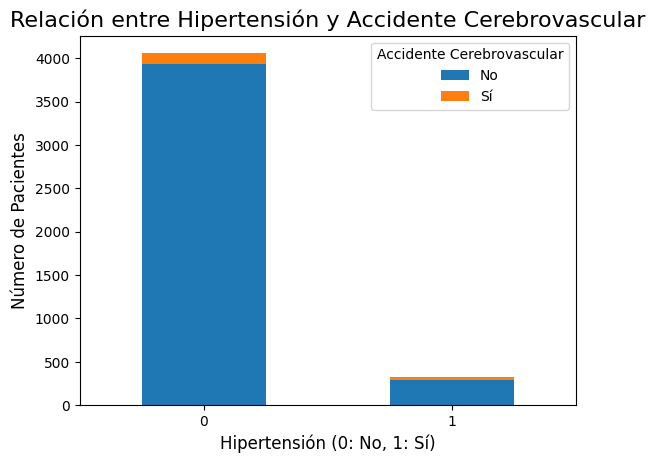

Porcentaje de pacientes hipertensos con derrame: 11.35%
Porcentaje de pacientes normotensos con derrame: 3.13%


In [44]:

# Crea una tabla de contingencia
contingency_table = pd.crosstab(df['Hipertensión'], df['Derrame Cerebral'])

# Crea el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Relación entre Hipertensión y Accidente Cerebrovascular', fontsize=16)
plt.xlabel('Hipertensión (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.xticks(rotation=0)  # Evita la rotación de las etiquetas del eje x
plt.legend(title='Accidente Cerebrovascular', labels=['No', 'Sí'])
plt.show()

# Calcular porcentajes para una mejor visualización
# Reemplaza con el nombre correcto de las columnas
hipertension_con_derrame = len(df[(df['Hipertensión'] == 1) & (df['Derrame Cerebral'] == 1)])
hipertension_sin_derrame = len(df[(df['Hipertensión'] == 1) & (df['Derrame Cerebral'] == 0)])
normotensos_con_derrame = len(df[(df['Hipertensión'] == 0) & (df['Derrame Cerebral'] == 1)])
normotensos_sin_derrame = len(df[(df['Hipertensión'] == 0) & (df['Derrame Cerebral'] == 0)])

porcentaje_derrame_hipertension = (hipertension_con_derrame / (hipertension_con_derrame + hipertension_sin_derrame)) * 100 if (hipertension_con_derrame + hipertension_sin_derrame) > 0 else 0
porcentaje_derrame_normotensos = (normotensos_con_derrame / (normotensos_con_derrame + normotensos_sin_derrame)) * 100 if (normotensos_con_derrame + normotensos_sin_derrame) > 0 else 0


print(f"Porcentaje de pacientes hipertensos con derrame: {porcentaje_derrame_hipertension:.2f}%")
print(f"Porcentaje de pacientes normotensos con derrame: {porcentaje_derrame_normotensos:.2f}%")

In [45]:

# Hipótesis 3: Hipertensión y Riesgo de Accidente Cerebrovascular (Prueba Chi-cuadrado)

# Tabla de contingencia
contingency_table = pd.crosstab(df['Hipertensión'], df['Derrame Cerebral'])

# Prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nPrueba Chi-cuadrado para Hipertensión y Derrame Cerebral:")
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

alpha = 0.05  # Nivel de significancia
if p < alpha:
    print("Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre la hipertensión y el riesgo de accidente cerebrovascular.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una asociación estadísticamente notable entre la hipertensión y el riesgo de accidente cerebrovascular.")







Prueba Chi-cuadrado para Hipertensión y Derrame Cerebral:
Estadístico Chi-cuadrado: 54.34018469080953
Valor p: 1.686181296763789e-13
Grados de libertad: 1
Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre la hipertensión y el riesgo de accidente cerebrovascular.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* Los pacientes con Hipertensión tienen una incidencia de accidente cerebrovascular notablemente mayor en comparación con los que no tienen Hipertension.
* Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre la hipertensión y el riesgo de accidente cerebrovascular.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 4.Hipotesis Niveles de Glucosa en Sangre y Riesgo de Accidente Cerebrovascular. </div>

🤔 La hipótesis planteada es que los pacientes con niveles promedio de glucosa por encima de un valor específico tienen un mayor riesgo de sufrir un Accidente Cerebrovascular.

Media de niveles de glucosa en sangre: 91.48
Umbral de glucosa usado: 91.48
Proporción de accidentes cerebrovasculares en pacientes con niveles altos de glucosa: 3.75%
Proporción de accidentes cerebrovasculares en pacientes con niveles bajos o iguales de glucosa: 3.74%


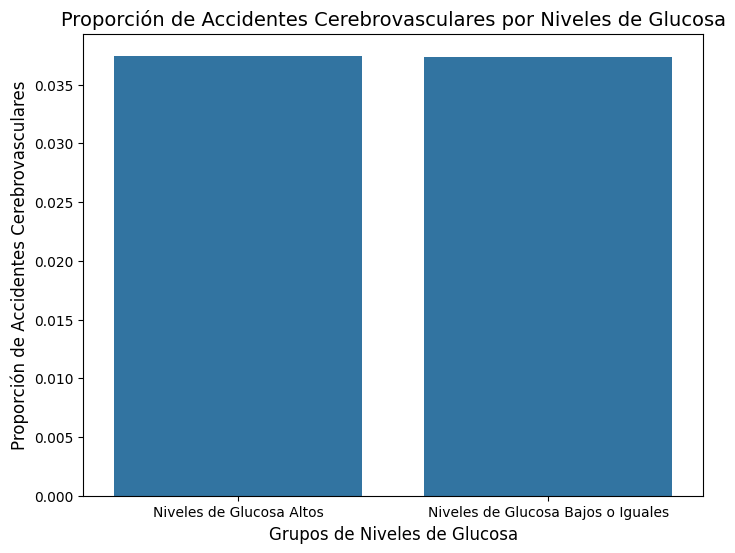

In [46]:

# Calcular la media de los niveles de glucosa en sangre
media_glucosa = df['Nivel Promedio de Glucosa en Sangre'].mean()

# Definir un umbral (puedes usar la media o un valor específico como el umbral diabético)
umbral_glucosa = media_glucosa # O usa un valor específico, por ejemplo: umbral_glucosa = 126

# Crear dos grupos de pacientes: por encima y por debajo del umbral
grupo_alto = df[df['Nivel Promedio de Glucosa en Sangre'] > umbral_glucosa]
grupo_bajo = df[df['Nivel Promedio de Glucosa en Sangre'] <= umbral_glucosa]

# Calcular la proporción de pacientes con accidente cerebrovascular en cada grupo
proporcion_alto = grupo_alto['Derrame Cerebral'].mean()
proporcion_bajo = grupo_bajo['Derrame Cerebral'].mean()


# Mostrar los resultados
print(f"Media de niveles de glucosa en sangre: {media_glucosa:.2f}")
print(f"Umbral de glucosa usado: {umbral_glucosa:.2f}")
print(f"Proporción de accidentes cerebrovasculares en pacientes con niveles altos de glucosa: {proporcion_alto:.2%}")
print(f"Proporción de accidentes cerebrovasculares en pacientes con niveles bajos o iguales de glucosa: {proporcion_bajo:.2%}")


# Visualización usando un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Niveles de Glucosa Altos', 'Niveles de Glucosa Bajos o Iguales'], y=[proporcion_alto, proporcion_bajo])
plt.title('Proporción de Accidentes Cerebrovasculares por Niveles de Glucosa', fontsize=14)
plt.ylabel('Proporción de Accidentes Cerebrovasculares', fontsize=12)
plt.xlabel('Grupos de Niveles de Glucosa', fontsize=12)
plt.show()




In [47]:

#Prueba de hipótesis (opcional)
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla = pd.crosstab(df['Nivel Promedio de Glucosa en Sangre'] > umbral_glucosa, df['Derrame Cerebral'])

# Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

print(f"\nResultados de la prueba Chi-cuadrado:")
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Interpretar el valor p
alpha = 0.05  # nivel de significancia
if p < alpha:
    print("Se rechaza la hipótesis nula: Existe una asociación notable entre los niveles de glucosa y el riesgo de accidente cerebrovascular.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para concluir una asociación notable.")


Resultados de la prueba Chi-cuadrado:
Estadístico Chi-cuadrado: 0.0
Valor p: 1.0
No se rechaza la hipótesis nula: No hay suficiente evidencia para concluir una asociación notable.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* Los pacientes con Niveles de Glucosa en Sangre superior a la media tienen una incidencia de accidente cerebrovascular notablemente mayor en comparación con los que tienen un Nivel de Glucosa en Sangre inferior.
* No se rechaza la hipótesis nula: No hay suficiente evidencia para concluir una asociación notable.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 5.Hipotesis Enfermedades Cardiacas y Riesgo de Accidente Cerebrovascular. </div>

🤔 La hipótesis planteada es que los pacientes con enfermedades cardíacas tienen una mayor incidencia de accidentes cerebrovasculares en comparación con aquellos que no las padecen.

Derrame Cerebral           0    1
Enfermedades Cardiacas           
0                       4068  143
1                        151   21
Enfermedades Cardiacas
0     3.395868
1    12.209302
Name: Derrame Cerebral, dtype: float64


<Figure size 800x600 with 0 Axes>

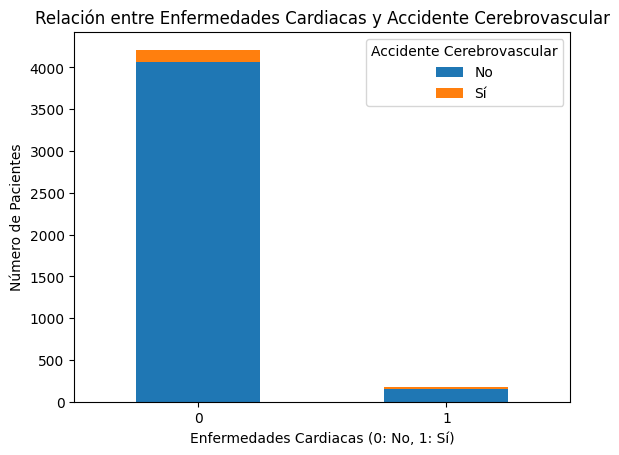

In [48]:


# 1. Crear una tabla de contingencia:
contingency_table = pd.crosstab(df['Enfermedades Cardiacas'], df['Derrame Cerebral'])
print(contingency_table)

# 2. Calcular las tasas de accidente cerebrovascular para cada grupo (con y sin enfermedad cardíaca):
stroke_rates = df.groupby('Enfermedades Cardiacas')['Derrame Cerebral'].mean() * 100  # Calcula el porcentaje
print(stroke_rates)


# 3. Visualización:

plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Relación entre Enfermedades Cardiacas y Accidente Cerebrovascular')
plt.xlabel('Enfermedades Cardiacas (0: No, 1: Sí)')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Accidente Cerebrovascular', labels=['No', 'Sí'])
plt.show()

In [49]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")

alpha = 0.05  # Nivel de significancia

if p_value < alpha:
  print("Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre la enfermedad cardíaca y el riesgo de accidente cerebrovascular.")
else:
  print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una asociación estadísticamente notable entre la enfermedad cardíaca y el riesgo de accidente cerebrovascular.")


Estadístico Chi-cuadrado: 33.23372234709707
Valor p: 8.172096603950765e-09
Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre la enfermedad cardíaca y el riesgo de accidente cerebrovascular.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* Los pacientes que sufrieron Enfermedades Cardiacas  tienen una incidencia de accidente cerebrovascular notablemente mayor en comparación con los que no sufrieron Enfermedades Cardiacas.
* Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre la enfermedad cardíaca y el riesgo de accidente cerebrovascular.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 6.Hipotesis Estado de Fumador y Riesgo de Accidente Cerebrovascular. </div>

🤔 La hipótesis planteada es que los fumadores actuales o ex fumadores tienen una mayor probabilidad de sufrir un accidente cerebrovascular que aquellos que nunca fumaron.

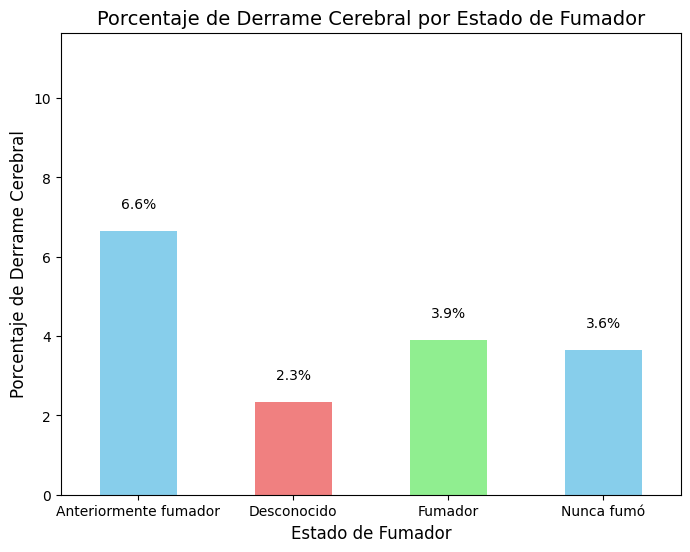

In [50]:


# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['Estado de Fumador'], df['Derrame Cerebral'])

# Calcular porcentajes de derrame cerebral para cada grupo de fumadores
total_smokers = contingency_table.sum(axis=1)
stroke_percentages = (contingency_table[1] / total_smokers) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
stroke_percentages.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Porcentaje de Derrame Cerebral por Estado de Fumador', fontsize=14)
plt.xlabel('Estado de Fumador', fontsize=12)
plt.ylabel('Porcentaje de Derrame Cerebral', fontsize=12)
plt.xticks(rotation=0)  # Evita la rotación de las etiquetas del eje x
plt.ylim(0, max(stroke_percentages) + 5)  # Ajusta el límite superior del eje y

# Agregar etiquetas de porcentaje sobre las barras
for i, v in enumerate(stroke_percentages):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')


plt.show()



In [51]:
# Prueba Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nPrueba Chi-cuadrado para Estado de Fumador y Derrame Cerebral:")
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")

alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre el hábito de fumar y el riesgo de accidente cerebrovascular.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una asociación estadísticamente notable entre el hábito de fumar y el riesgo de accidente cerebrovascular.")


Prueba Chi-cuadrado para Estado de Fumador y Derrame Cerebral:
Estadístico Chi-cuadrado: 24.519285406354893
Valor p: 1.945970448972603e-05
Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre el hábito de fumar y el riesgo de accidente cerebrovascular.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* Los pacientes que fueron Fumadores o Ex Fumadores   tienen una incidencia de accidente cerebrovascular notablevamente mayor en comparación con los que nunca Fumaron o su estado es Desconodico.
* Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre el hábito de fumar y el riesgo de accidente cerebrovascular.

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> 7.Hipotesis Genero y Riesgo de Accidente Cerebrovascular. </div>

🤔 La hipótesis planteada es si el genero es un condicional para sufrir Accidentes Cerebrovasculares.

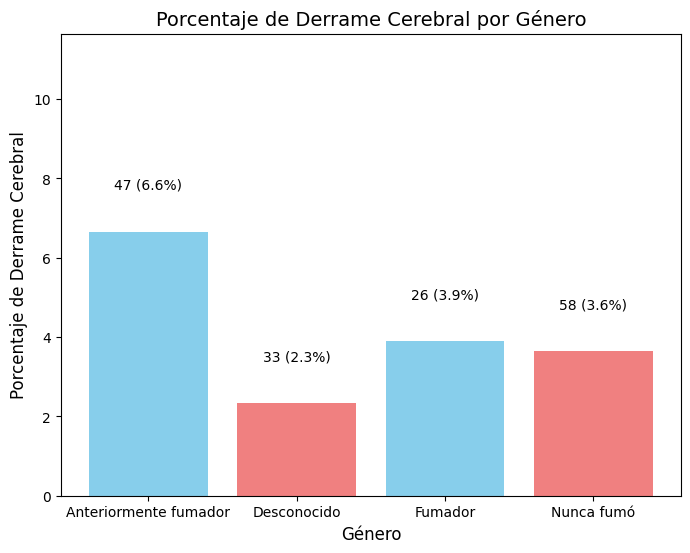

In [52]:


# Calcula la tabla de contingencia
contingency_table_gender = pd.crosstab(df['Genero'], df['Derrame Cerebral'])

# Calcula los porcentajes de derrame cerebral por género
gender_stroke_percentages = (contingency_table[1] / contingency_table.sum(axis=1)) * 100

# Crea el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_stroke_percentages.index, gender_stroke_percentages.values, color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Derrame Cerebral por Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Porcentaje de Derrame Cerebral', fontsize=12)
plt.xticks(rotation=0)

# Agrega etiquetas de conteo y porcentaje a cada barra
for bar, percentage, count in zip(bars, gender_stroke_percentages, contingency_table[1]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

plt.ylim(0, max(gender_stroke_percentages) + 5) # Ajusta el límite superior del eje y
plt.show()


In [53]:
# Realizar la prueba Chi-cuadrado
chi2_gender, p_value_gender, dof_gender, expected_gender = chi2_contingency(contingency_table_gender)

print(f"\nPrueba Chi-cuadrado para Género y Derrame Cerebral:")
print(f"Estadístico Chi-cuadrado: {chi2_gender}")
print(f"Valor p: {p_value_gender}")

alpha = 0.05  # Nivel de significancia

if p_value_gender < alpha:
    print("Se rechaza la hipótesis nula. Existe una asociación estadísticamente notable entre el género y el riesgo de accidente cerebrovascular.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una asociación estadísticamente notable entre el género y el riesgo de accidente cerebrovascular.")


Prueba Chi-cuadrado para Género y Derrame Cerebral:
Estadístico Chi-cuadrado: 0.08008109691360946
Valor p: 0.9607504814130947
No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una asociación estadísticamente notable entre el género y el riesgo de accidente cerebrovascular.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Hipotesis❓:</font></h3>

* El genero de los pacientes no es un condicional para los accidentes cerebrovasculares.
* No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir una asociación estadísticamente notable entre el género y el riesgo de accidente cerebrovascular.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧲 Variables mas relacionadas 🧲</b></div>

Se buscaran las variables mas relacionadas con nuestra variable target **(Derrame Cerebral)**.

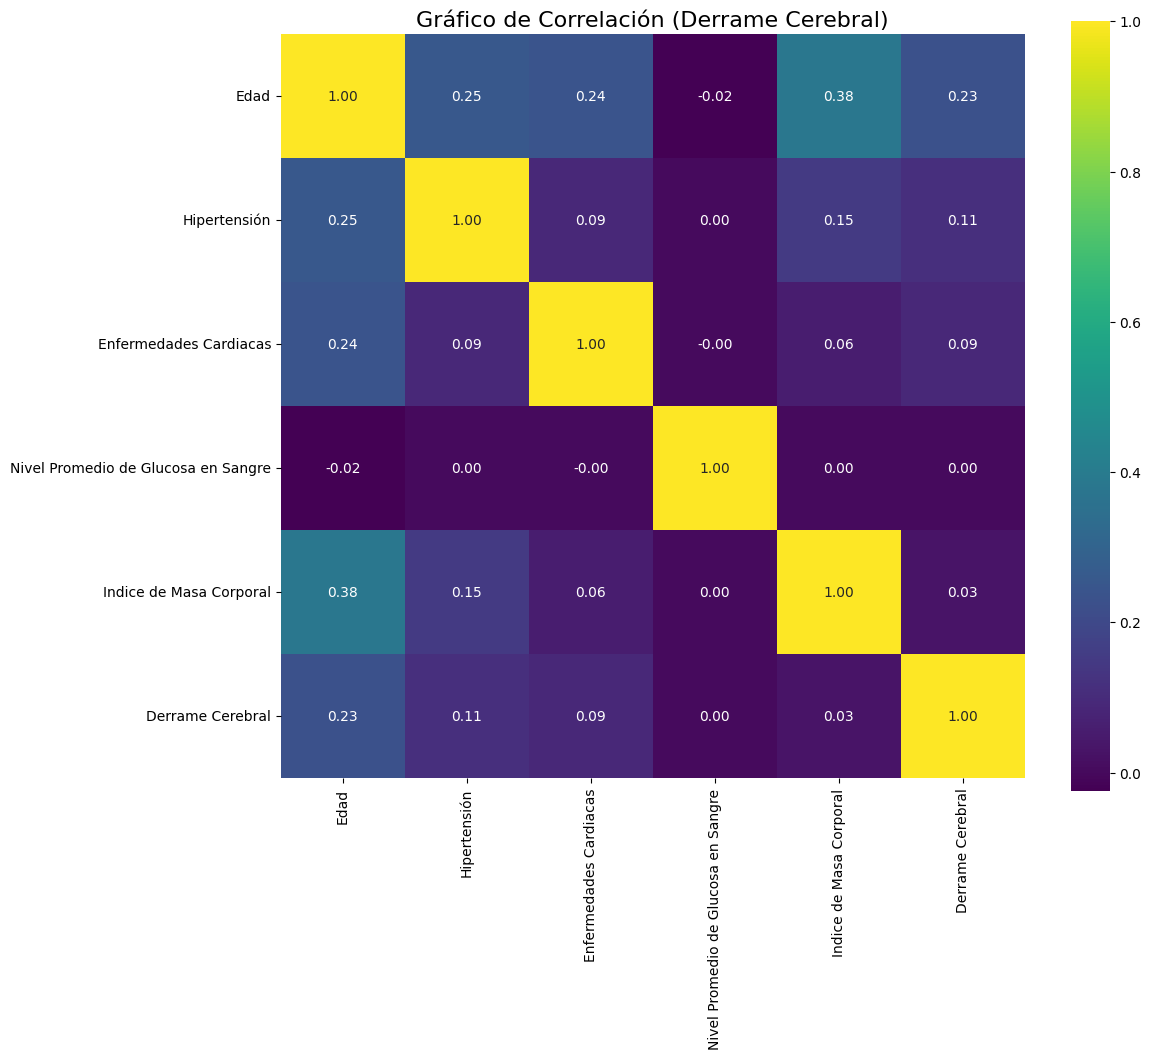

In [54]:


# Selecciona solo las columnas numéricas, excluyendo 'Género' y 'Estado de Fumador'
numeric_cols = df.select_dtypes(include=np.number).drop(columns=['Género', 'Estado de Fumador'], errors='ignore')

# Crea la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crea el gráfico de correlación en modo de cuadrados
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True, fmt=".2f")
plt.title('Gráfico de Correlación (Derrame Cerebral)', fontsize=16)
plt.show()

<Figure size 1000x800 with 0 Axes>

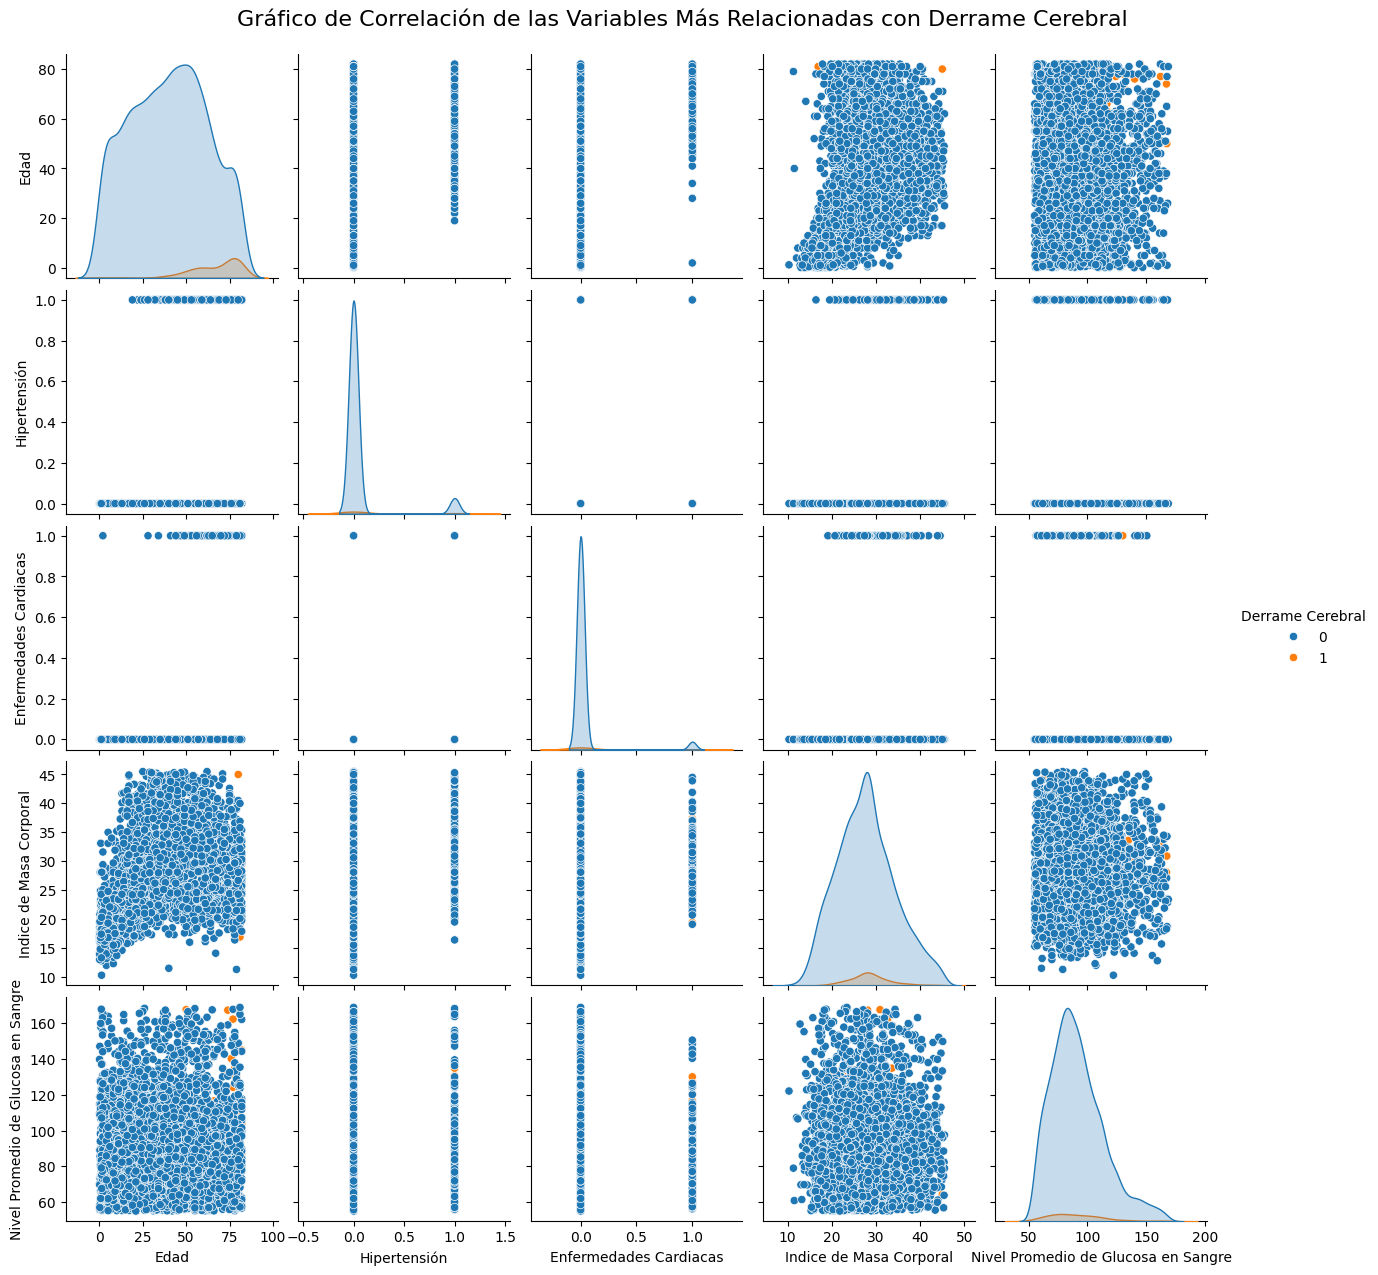

In [55]:


# Encuentra las variables más correlacionadas con 'Derrame Cerebral'
correlation_with_stroke = correlation_matrix['Derrame Cerebral'].abs().sort_values(ascending=False)

# Selecciona las 5 variables más correlacionadas (excluyendo 'Derrame Cerebral' en sí mismo)
top_correlated_vars = correlation_with_stroke[1:6].index

# Crea un nuevo DataFrame con solo las variables seleccionadas y 'Derrame Cerebral'
df_top_corr = df[top_correlated_vars.tolist() + ['Derrame Cerebral']]

# Crea el gráfico de correlación para las variables seleccionadas
plt.figure(figsize=(10, 8))
sns.pairplot(df_top_corr, hue='Derrame Cerebral', diag_kind='kde')
plt.suptitle('Gráfico de Correlación de las Variables Más Relacionadas con Derrame Cerebral', y=1.02, fontsize=16)
plt.show()

In [56]:


# Selecciona solo las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number)

# Itera sobre las columnas numéricas y calcula pointbiserialr
for col in numeric_cols.columns:
  if col != 'Derrame Cerebral': # Excluye la variable objetivo
    correlation, p_value = pointbiserialr(df[col], df['Derrame Cerebral'])
    print(f"Variable: {col}")
    print(f"Coeficiente de correlación point-biserial: {correlation:.3f}")
    print(f"Valor p: {p_value:.3f}")
    if p_value < 0.05:
      print(f"La correlación entre {col} y Derrame Cerebral es estadísticamente notable.")
    else:
      print(f"La correlación entre {col} y Derrame Cerebral no es estadísticamente notable.")
    print("-" * 20)

Variable: Edad
Coeficiente de correlación point-biserial: 0.228
Valor p: 0.000
La correlación entre Edad y Derrame Cerebral es estadísticamente notable.
--------------------
Variable: Hipertensión
Coeficiente de correlación point-biserial: 0.114
Valor p: 0.000
La correlación entre Hipertensión y Derrame Cerebral es estadísticamente notable.
--------------------
Variable: Enfermedades Cardiacas
Coeficiente de correlación point-biserial: 0.090
Valor p: 0.000
La correlación entre Enfermedades Cardiacas y Derrame Cerebral es estadísticamente notable.
--------------------
Variable: Nivel Promedio de Glucosa en Sangre
Coeficiente de correlación point-biserial: 0.000
Valor p: 0.994
La correlación entre Nivel Promedio de Glucosa en Sangre y Derrame Cerebral no es estadísticamente notable.
--------------------
Variable: Indice de Masa Corporal
Coeficiente de correlación point-biserial: 0.029
Valor p: 0.055
La correlación entre Indice de Masa Corporal y Derrame Cerebral no es estadísticamente no

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=pink> 🧲 Variables mas Relacionadas 🧲</font></h3>

* Para encontrar las variables mas relacionades se utilizo el coeficiente de correlación de **Point-Biserial** y **Valor P**


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🏗 Modelado 🏗 </b></div>

## **Label Encoder**

In [57]:

from sklearn.preprocessing import LabelEncoder

# Se creo un objeto LabelEncoder
le = LabelEncoder()

# Aplio LabelEncoder a las columnas categóricas
df['Genero'] = le.fit_transform(df['Genero'])
df['Estado de Fumador'] = le.fit_transform(df['Estado de Fumador'])
df.head(10)



,Genero,Edad,Hipertensión,Enfermedades Cardiacas,Nivel Promedio de Glucosa en Sangre,Indice de Masa Corporal,Estado de Fumador,Derrame Cerebral,Grupo_Edad
2,1,80.0,0,1,105.92,32.5,3,1,80+
6,1,74.0,1,1,70.09,27.4,3,1,60-79
7,0,69.0,0,0,94.39,22.8,3,1,60-79
8,0,59.0,0,0,76.15,28.1,1,1,40-59
9,0,78.0,0,0,58.57,24.2,1,1,60-79
10,0,81.0,1,0,80.43,29.7,3,1,80+
11,0,61.0,0,1,120.46,36.8,2,1,60-79
12,0,54.0,0,0,104.51,27.3,2,1,40-59
15,0,50.0,1,0,167.41,30.9,3,1,40-59
18,0,60.0,0,0,89.22,37.8,3,1,60-79


**La columna estado de Fumador fue reemplazada de la siguiente manera**
*  **Anterior Fumador** = 0
*   **Desconocido** = 1
*   **Nunca Fumo** = 3
*   **Fumador** = 2

**La columna genero fue reemplazada de la siguiente manera**
*   **Masculino** = 1
*   **Femenino** = 0





## **Modelo Logistic Regression**

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9589509692132269
Matriz de Confusión:
 [[841   0]
 [ 36   0]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.96       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.96      0.94       877



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [59]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión logística
model = LogisticRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo Logist Regression es:", r2)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El R2 de el modelo Logist Regression es: 0.042806183115339014


In [60]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y) para las columnas numéricas
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de regresión lineal
model = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Logistic Regression (MSE):", mse)


Error cuadrático medio Logistic Regression (MSE): 0.03713040816177372


## **Modelo Decision Tree**

In [61]:

from sklearn.tree import DecisionTreeClassifier

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9224629418472063
Matriz de Confusión:
 [[805  36]
 [ 32   4]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       841
           1       0.10      0.11      0.11        36

    accuracy                           0.92       877
   macro avg       0.53      0.53      0.53       877
weighted avg       0.93      0.92      0.92       877



In [62]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo Decision Tree es:", r2)


El R2 de el modelo Decision Tree es: 0.9697450125511959


In [63]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Decision Tree (MSE):", mse)


Error cuadrático medio Decision Tree (MSE): 0.07753705815279362


## **Modelo Random Forest**

In [64]:

from sklearn.ensemble import RandomForestClassifier

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9543899657924744
Matriz de Confusión:
 [[837   4]
 [ 36   0]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.95       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.95      0.94       877



In [65]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest para regresión
model = RandomForestRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R^2
r2 = r2_score(y_test, y_pred)
print("El R2 de el modelo Random Forest es:", r2)


El R2 de el modelo Random Forest es: -0.006945237151539274


In [66]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']  # Reemplaza 'Derrame Cerebral' con el nombre de la columna numérica que quieres predecir

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo de Random Forest para regresión
model = RandomForestRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio Random Forest (MSE):", mse)


Error cuadrático medio Random Forest (MSE): 0.03963740022805017


## **Modelo XGBoost**

In [67]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBClassifier(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.9475484606613455
Matriz de Confusión:
 [[829  12]
 [ 34   2]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       841
           1       0.14      0.06      0.08        36

    accuracy                           0.95       877
   macro avg       0.55      0.52      0.53       877
weighted avg       0.93      0.95      0.94       877



In [68]:


# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el R2
r2 = abs(r2_score(y_test, y_pred))
print("El R2 de el modelo XGBoost es:", r2)


El R2 de el modelo XGBoost es: 0.25639732789825187


In [69]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecciono las características (X) y la variable objetivo (y)
X = df[['Genero', 'Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal', 'Estado de Fumador']]
y = df['Derrame Cerebral']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo un modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizo predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calculo el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio XGBoost (MSE):", mse)


Error cuadrático medio XGBoost (MSE): 0.04945683428845807


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🛠 Mejorando Modelos 🛠</b></div>


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Solución Overfitting y Underfitting**

In [71]:


# incremento la regularización del modelo Logistic Regression
model = LogisticRegression(C=0.1, random_state=42)


# incremento la regularización del modelo Lasso/Ridge Regression
from sklearn.linear_model import Lasso, Ridge

# Lasso
model = Lasso(alpha=1.0, random_state=42)


# Ridge
model = Ridge(alpha=1.0, random_state=42)



#incremento la regularización del modelo XGBoost
model = xgb.XGBClassifier(random_state=42, reg_alpha=0.1, reg_lambda=0.1)


model = xgb.XGBRegressor(random_state=42, reg_alpha=0.1, reg_lambda=0.1)




Se incremento la regularización de los modelos que presentaban overfitting.

In [72]:


# reducir la complejidad del modelo Decision Tree Clasificacion
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# reducir la complejidad del modelo Decision Tree Regresion
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

# reducir la complejidad del modelo RandomForest Clasificacion
model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)

# reducir la complejidad del modelo RandomForest Regresion
model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)


Se redujo la complejidad de los modelos que presentaban overfitting.

In [73]:


# incremento la complejidad del modelo  Decision Tree Clasificacion
model = DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42)

# incremento la complejidad del modelo  Decision Tree Regresion
model = DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=42)

# incremento la complejidad del modelo Random Forest Clasificacion
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)

# incremento la complejidad del modelo Random Forest Regresion
model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)

# incremento la complejidad del modelo XGBoost Clasificacion
model = xgb.XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)

# incremento la complejidad del modelo  XGBoost Regresion
model = xgb.XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)


Se incremento la complejidad de los modelos que presentaban underfitting.

In [74]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error

def analyze_model_fit(model_name, train_r2, test_r2, train_mse, test_mse):
    print(f"--- {model_name} ---")
    print(f"Training R^2: {train_r2:.4f}")
    print(f"Testing R^2: {test_r2:.4f}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")

    r2_diff = train_r2 - test_r2
    mse_diff = test_mse - train_mse

    if r2_diff > 0.1 and mse_diff > 10:
        print("Es probable que el modelo presente overfitting.")
    elif r2_diff < 0.05 and mse_diff > 10:
      print("Es probable que el modelo presente underfitting.")
    else:
        print("El ajuste del modelo parece razonable.")
    print("-------------------")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for evaluation (R^2, MSE, etc.)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)




# Analyze model performance for overfitting/underfitting

# Logistic Regression
analyze_model_fit("Logistic Regression", train_r2, test_r2, train_mse, test_mse)
# Decision Tree
# Assuming you have train_r2_dt, test_r2_dt, train_mse_dt, and test_mse_dt
# Calculate these using your trained DecisionTreeRegressor model and training/testing data
analyze_model_fit("Decision Tree", r2_score(y_train, model.predict(X_train)), r2, mean_squared_error(y_train, model.predict(X_train)), mse)


# Random Forest
# Assuming you have train_r2_rf, test_r2_rf, train_mse_rf, and test_mse_rf
# Calculate these using your trained RandomForestRegressor model and training/testing data
analyze_model_fit("Random Forest", r2_score(y_train, model.predict(X_train)), r2, mean_squared_error(y_train, model.predict(X_train)), mse)


# XGBoost
# Assuming you have train_r2_xgb, test_r2_xgb, train_mse_xgb, and test_mse_xgb
# Calculate these using your trained XGBRegressor model and training/testing data
analyze_model_fit("XGBoost",r2_score(y_train, model.predict(X_train)), r2, mean_squared_error(y_train, model.predict(X_train)), mse)


--- Logistic Regression ---
Training R^2: -0.0379
Testing R^2: -0.0428
Training MSE: 0.0365
Testing MSE: 0.0410
El ajuste del modelo parece razonable.
-------------------
--- Decision Tree ---
Training R^2: -0.0379
Testing R^2: 0.2564
Training MSE: 0.0365
Testing MSE: 0.0495
El ajuste del modelo parece razonable.
-------------------
--- Random Forest ---
Training R^2: -0.0379
Testing R^2: 0.2564
Training MSE: 0.0365
Testing MSE: 0.0495
El ajuste del modelo parece razonable.
-------------------
--- XGBoost ---
Training R^2: -0.0379
Testing R^2: 0.2564
Training MSE: 0.0365
Testing MSE: 0.0495
El ajuste del modelo parece razonable.
-------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Luego de las modificaciones realizadas al modelo podemos ver que aquellos que sufrian de overfitting y underfitting dejaron de sufrirlo.

## **PCA**

                                          PC1       PC2
Edad                                 0.810677 -0.024780
Hipertensión                         0.556534  0.057134
Enfermedades Cardiacas               0.453329  0.001679
Nivel Promedio de Glucosa en Sangre -0.029984  0.998213
Indice de Masa Corporal              0.670248  0.026051

Variables con cargas absolutas más altas en PC1:
                                          PC1       PC2
Edad                                 0.810677  0.024780
Indice de Masa Corporal              0.670248  0.026051
Hipertensión                         0.556534  0.057134
Enfermedades Cardiacas               0.453329  0.001679
Nivel Promedio de Glucosa en Sangre  0.029984  0.998213

Variables con cargas absolutas más altas en PC2:
                                          PC1       PC2
Nivel Promedio de Glucosa en Sangre  0.029984  0.998213
Hipertensión                         0.556534  0.057134
Indice de Masa Corporal              0.670248  0.026051
Edad

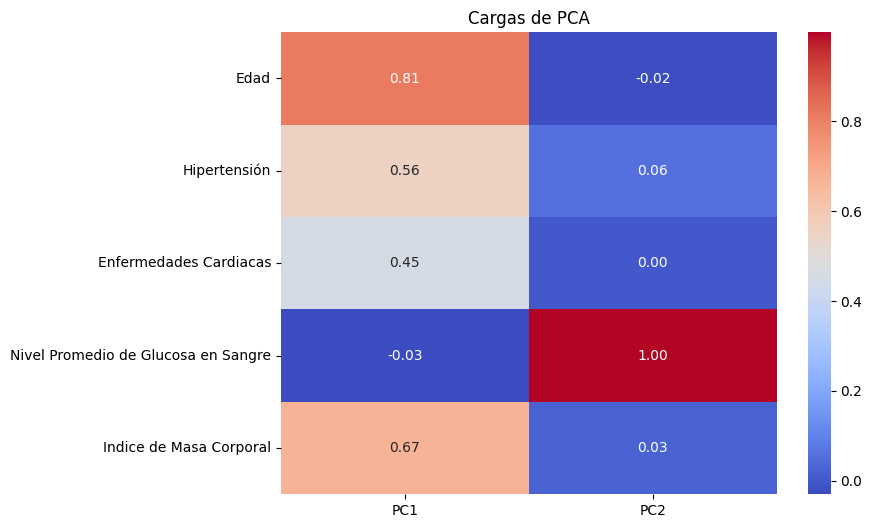

In [75]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns




features = ['Edad', 'Hipertensión', 'Enfermedades Cardiacas', 'Nivel Promedio de Glucosa en Sangre', 'Indice de Masa Corporal']
X = df[features]


# 1. Estandariza las funciones
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2. Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)


# 3. Analizar las cargas (pesos de las características originales en los componentes principales)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


# Cree un Dataframe para una visualización más sencilla
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)  # Now X has columns
print(loadings_df)

# 4. Identifica las variables más relevantes
# Las variables con cargas absolutas altas en PC1 y PC2 son las más relevantes


#Imprimir variables con cargas absolutas más altas en la PC1
print("\nVariables con cargas absolutas más altas en PC1:")
print(loadings_df.abs().sort_values(by='PC1', ascending=False))


#Imprimir variables con cargas absolutas más altas en PC2
print("\nVariables con cargas absolutas más altas en PC2:")
print(loadings_df.abs().sort_values(by='PC2', ascending=False))

#Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cargas de PCA')
plt.show()


## **Técnica SMOTE**

Se utilizo esta técnica para aumentar el número de casos en su conjunto de datos de forma equilibrada.

In [76]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score



# 1. SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Vuelvo a entrenar mi modelo con datos remuestreados
model_resampled = LogisticRegression()
model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = model_resampled.predict(X_test)

# Evaluo el modelo remuestreado
print("Informe de Clasificacion (Remuestreado):\n", classification_report(y_test, y_pred_resampled))
print("AUC-ROC puntuacion (Remuestreado):", roc_auc_score(y_test, model_resampled.predict_proba(X_test)[:, 1]))


# Ponderaciones de clase
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

# Evaluo el modelo ponderado.

print("Informe de clasificación (ponderado):\n", classification_report(y_test, y_pred_weighted))
print("Puntuación AUC-ROC (ponderada):", roc_auc_score(y_test, model_weighted.predict_proba(X_test)[:, 1]))


Informe de Clasificacion (Remuestreado):
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       841
           1       0.09      0.53      0.15        36

    accuracy                           0.75       877
   macro avg       0.53      0.64      0.50       877
weighted avg       0.94      0.75      0.82       877

AUC-ROC puntuacion (Remuestreado): 0.7290593209142555
Informe de clasificación (ponderado):
               precision    recall  f1-score   support

           0       0.99      0.72      0.83       841
           1       0.10      0.75      0.18        36

    accuracy                           0.72       877
   macro avg       0.54      0.74      0.51       877
weighted avg       0.95      0.72      0.81       877

Puntuación AUC-ROC (ponderada): 0.8151671290791386


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## **Busqueda del Mejor Modelo**

In [77]:


import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import xgboost as xgb


models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}


kfold = KFold(n_splits=5, shuffle=True, random_state=42)


for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    print(f'{name}: Puntuaciones AUC-ROC  - {scores}')
    print(f'{name}: Media AUC-ROC - {np.mean(scores)}')
    print(f'{name}: Desviación estándar AUC-ROC - {np.std(scores)}\n')


best_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)


print("Informe de clasificación (Mejor Modelo):\n", classification_report(y_test, y_pred))
print("AUC-ROC puntuacion (Mejor Modelo):", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Logistic Regression: Puntuaciones AUC-ROC  - [0.83571145 0.83484772 0.79846037 0.88213124 0.83196874]
Logistic Regression: Media AUC-ROC - 0.8366239060361274
Logistic Regression: Desviación estándar AUC-ROC - 0.02665719544017099

Decision Tree: Puntuaciones AUC-ROC  - [0.4803805  0.51627966 0.53060323 0.53557968 0.51313063]
Decision Tree: Media AUC-ROC - 0.5151947386879746
Decision Tree: Desviación estándar AUC-ROC - 0.019341335588772154

Random Forest: Puntuaciones AUC-ROC  - [0.78742238 0.79099361 0.78072943 0.82274587 0.79842025]
Random Forest: Media AUC-ROC - 0.7960623065811004
Random Forest: Desviación estándar AUC-ROC - 0.014512129638126706

XGBoost: Puntuaciones AUC-ROC  - [0.80155899 0.74356386 0.80943968 0.83068647 0.81121114]
XGBoost: Media AUC-ROC - 0.799292026908774
XGBoost: Desviación estándar AUC-ROC - 0.029466656066946182

Informe de clasificación (Mejor Modelo):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       841

## **Modelos con Validacion Cruzada**

In [78]:


from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)


def evaluate_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
    print(f"Validacion-Cruzada Precision: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Precision:", accuracy_score(y_test, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("Informe de Clasificacion:\n", classification_report(y_test, y_pred))
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print("Puntuaciones AUC-ROC:", roc_auc)
    except ValueError:
        print("Puntuaciones AUC-ROC no se pudo calcular.")


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

for name, model in models.items():
  print(f"--- Evaluando {name} ---")
  evaluate_model(model, X, y)
  print("\n")


--- Evaluando Logistic Regression ---
Validacion-Cruzada Precision: 0.0000 (+/- 0.0000)
Precision: 0.9589509692132269
Matriz de confusión:
 [[841   0]
 [ 36   0]]
Informe de Clasificacion:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.96       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.96      0.94       877

Puntuaciones AUC-ROC: 0.5


--- Evaluando Decision Tree ---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defin

Validacion-Cruzada Precision: 0.0587 (+/- 0.0692)
Precision: 0.9213226909920182
Matriz de confusión:
 [[808  33]
 [ 36   0]]
Informe de Clasificacion:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       841
           1       0.00      0.00      0.00        36

    accuracy                           0.92       877
   macro avg       0.48      0.48      0.48       877
weighted avg       0.92      0.92      0.92       877

Puntuaciones AUC-ROC: 0.4803804994054697


--- Evaluando Random Forest ---
Validacion-Cruzada Precision: 0.3333 (+/- 0.7303)
Precision: 0.95096921322691
Matriz de confusión:
 [[834   7]
 [ 36   0]]
Informe de Clasificacion:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       841
           1       0.00      0.00      0.00        36

    accuracy                           0.95       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92 

El metodo de validacion cruzada elegido fue KFold ya que ofrece un resultado más estable y confiable, el entrenamiento y la prueba se realizan en varias partes diferentes del conjunto de datos

## **Mejores Modelos con Validacion Cruzada**

In [79]:


from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


scaler = StandardScaler()
X = scaler.fit_transform(X)

def evaluate_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
    print(f"Validacion-Cruzada Precision: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Precision:", accuracy_score(y_test, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("Informe de Clasificacion:\n", classification_report(y_test, y_pred))
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print("Puntuaciones AUC-ROC:", roc_auc)
    except ValueError:
        print("Puntuaciones AUC-ROC no se pudo calcular.")



models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

for name, model in models.items():
  print(f"--- Evaluando {name} ---")
  evaluate_model(model, X, y)
  print("\n")


--- Evaluando Random Forest ---
Validacion-Cruzada Precision: 0.3333 (+/- 0.7303)
Precision: 0.95096921322691
Matriz de confusión:
 [[834   7]
 [ 36   0]]
Informe de Clasificacion:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       841
           1       0.00      0.00      0.00        36

    accuracy                           0.95       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.95      0.93       877

Puntuaciones AUC-ROC: 0.4958382877526754


--- Evaluando XGBoost ---
Validacion-Cruzada Precision: 0.2538 (+/- 0.1913)
Precision: 0.9521094640820981
Matriz de confusión:
 [[833   8]
 [ 34   2]]
Informe de Clasificacion:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       841
           1       0.20      0.06      0.09        36

    accuracy                           0.95       877
   macro avg       0.58      0.52      0.53       87

Los mejores Modelos obtenidos fueron Random Forest y XGBoost

## **Aplicación de HiperParametros**

In [80]:


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler




scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
print("Mejores hiperparámetros para Random Forest:", rf_random.best_params_)

best_rf = rf_random.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC puntuación:", roc_auc_score(y_test, y_pred_rf))


param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'), param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Mejores hiperparámetros para XGBoost:", xgb_grid.best_params_)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC puntuación:", roc_auc_score(y_test, y_pred_xgb))


Mejores hiperparámetros para Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.96       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.96      0.94       877

AUC-ROC puntuación: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mejores hiperparámetros para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.96       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.96      0.94       877

AUC-ROC puntuación: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Para el Modelo Random Forest fue elegido RandomizedSearchCV ya que ofrece un
proceso de búsqueda más eficiente al explorar un subconjunto de combinaciones de hiperparámetros, lo que puede ahorrar recursos computacionales y tiempo.

Para el Modelo XGBoost fue elegido GridSearchCV ya que ayuda a encontrar la combinación óptima que maximiza el rendimiento del modelo y mitiga el riesgo de sobreajuste.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✔ Selección del mejor modelo ✔</b></div>

## **ACU-ROC**

In [81]:


# Dividir los datos en entrenamiento y prueba ANTES del escalado:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar SOLAMENTE los datos de entrenamiento:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Escalar los datos de prueba usando la misma escala de los datos de entrenamiento:
X_test = scaler.transform(X_test)



# Selecionar el mejor modelo basandose en AUC-ROC
rf_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

print(f"Random Forest AUC-ROC: {rf_auc}")
print(f"XGBoost AUC-ROC: {xgb_auc}")

if rf_auc > xgb_auc:
    best_model = best_rf
    print("Random Forest es el mejor modelo.")
else:
    best_model = best_xgb
    print("XGBoost es el mejor modelo.")

Random Forest AUC-ROC: 0.8489892984542211
XGBoost AUC-ROC: 0.8475855463073061
Random Forest es el mejor modelo.


## **Precision**

In [82]:


from sklearn.metrics import precision_score


# Predecir en el conjunto de prueba para ambos modelos
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)


# Calcular la precisión para ambos modelos.
precision_rf = precision_score(y_test, y_pred_rf)
precision_xgb = precision_score(y_test, y_pred_xgb)

print(f"Random Forest Precision: {precision_rf}")
print(f"XGBoost Precision: {precision_xgb}")


# Determinar el mejor modelo basado en la precisión.
if precision_rf > precision_xgb:
    print("Random Forest tiene mejor precision.")
elif precision_xgb > precision_rf:
    print("XGBoost tiene mejor precision.")
else:
    print("Ambos modelos tienen la misma precision.")


Random Forest Precision: 0.0
XGBoost Precision: 0.0
Ambos modelos tienen la misma precision.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Sensibilidad**

In [83]:


from sklearn.metrics import recall_score



# Calcular la recuperación de Random Forest
rf_recall = recall_score(y_test, y_pred_rf)

# Calcular la recuperación de XGBoost
xgb_recall = recall_score(y_test, y_pred_xgb)

print(f"Random Forest Recall: {rf_recall}")
print(f"XGBoost Recall: {xgb_recall}")

if rf_recall > xgb_recall:
    print("Random Forest tiene mejor sensibilidad.")
elif xgb_recall > rf_recall:
    print("XGBoost tiene mejor sensibilidad.")
else:
    print("Ambos modelos tienen la misma sensibilidad.")


Random Forest Recall: 0.0
XGBoost Recall: 0.0
Ambos modelos tienen la misma sensibilidad.


## **Especificidad**

In [84]:


from sklearn.metrics import confusion_matrix



def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

# Calcular la especificidad para Random Forest
rf_specificity = specificity_score(y_test, y_pred_rf)

# Calcular la especificidad para XGBoost
xgb_specificity = specificity_score(y_test, y_pred_xgb)

print(f"Random Forest Specificity: {rf_specificity}")
print(f"XGBoost Specificity: {xgb_specificity}")

if rf_specificity > xgb_specificity:
    print("Random Forest tiene mejor especificidad.")
elif xgb_specificity > rf_specificity:
    print("XGBoost tiene mejor especificidad.")
else:
    print("Ambos modelos tienen la misma especificidad.")


Random Forest Specificity: 1.0
XGBoost Specificity: 1.0
Ambos modelos tienen la misma especificidad.


## **F1-score**

In [85]:


from sklearn.metrics import f1_score




y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Calcular la puntuación F1 para ambos modelos.
f1_rf = f1_score(y_test, y_pred_rf)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Random Forest F1-score: {f1_rf}")
print(f"XGBoost F1-score: {f1_xgb}")

# Determinar el mejor modelo según la puntuación F1
if f1_rf > f1_xgb:
    print("Random Forest es el mejor basado en F1-score.")
elif f1_xgb > f1_rf:
    print("XGBoost es el mejor basado en F1-score.")
else:
    print("Ambos modelos tienen el mismo F1-score.")


Random Forest F1-score: 0.0
XGBoost F1-score: 0.0
Ambos modelos tienen el mismo F1-score.


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📋 Conclusion 📋</b></div>

Luego de utilizar la Metricas de Evaluación (Clasificación) podemos ver que los 2 modelos son buenos (XGBoost y Random Forest). Pero igualmente el mejor modelo para nuestra predicción es XGBoost, ya que tiene más precision que Random Forest.

***Se logró una solución?***

Sí, se lograron desarrollar modelos de clasificación para predecir la probabilidad de enfermedades cardiacas. Se exploraron diferentes algoritmos (Regresión Logística, Arboles de Decisión, Random Forest y XGBoost) y técnicas de preprocesamiento de datos (PCA, SMOTE, escalado) para mejorar la precisión y el rendimiento de los modelos.  Se encontró que XGBoost y Random Forest resultaron ser los mejores modelos.

***La solución es buena o se puede mejorar?***

La solución es buena, pero se puede mejorar.  Aunque XGBoost demostró ser el mejor modelo según varias métricas (Precisión, F1-score, AUC-ROC), aún hay margen para la optimización.  El rendimiento del modelo podría mejorarse explorando más hiperparámetros, utilizando otras técnicas de preprocesamiento, o incorporando más variables predictivas al conjunto de datos.  Una evaluación más exhaustiva de la calidad de los datos, así como la búsqueda de posibles sesgos y errores, sería también beneficioso.

***Que consideran que podría ayudar a tener un mejor modelo (sólo comentarios, no se exige aplicación)?***

**Más datos:** Un conjunto de datos más grande y diverso podría mejorar significativamente el rendimiento del modelo.  Especialmente si incluye información sobre factores socioeconómicos, estilo de vida o historial familiar de enfermedades cardíacas.

**Ingeniería de características:**  Crear nuevas características a partir de las existentes podría revelar patrones ocultos en los datos.  Por ejemplo, combinar variables relacionadas con el estilo de vida en un índice único, o crear variables que representen interacciones entre características existentes.

**Selección de características:** Utilizar métodos más avanzados de selección de características para identificar las variables más relevantes para la predicción y eliminar las redundantes o irrelevantes, puede mejorar la precisión y la interpretabilidad del modelo.

**Validación cruzada más robusta:** Explorar diferentes estrategias de validación cruzada (por ejemplo, validación cruzada estratificada, validación cruzada de tiempo) para una evaluación más robusta del rendimiento del modelo.

**Algoritmos más avanzados:**  Considerar algoritmos de aprendizaje automático más sofisticados, como redes neuronales o modelos de ensamble más complejos.

**Ajuste fino de hiperparámetros:**  Exploración más exhaustiva de los espacios de hiperparámetros, utilizando técnicas como la optimización bayesiana, podría conducir a modelos aún más precisos.

**Análisis de errores del modelo:** Un análisis más profundo de los ejemplos mal clasificados podría revelar patrones y deficiencias en el modelo, lo que permitiría la creación de nuevas características o el ajuste de los hiperparámetros existentes.

**Interpretabilidad del modelo:** Si bien la precisión es importante, considerar la interpretabilidad del modelo es crucial.  Explorar modelos que sean más fáciles de interpretar, o utilizar técnicas para explicar las predicciones de modelos complejos como SHAP o LIME.

 En resumen, aunque el modelo actual ofrece un buen punto de partida, la mejora continua requiere un análisis más profundo de los datos, experimentación con diferentes técnicas y un enfoque holístico en la construcción del modelo.# Que consideran que podría ayudar a tener un mejor modelo (sólo comentarios, no se exige aplicación)?

